# Gerekli Kütüphanelerin Yüklenmesi


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import norm
from scipy import stats

# Veri Setinin Okunması ve İçeriğinin İncelenmesi

In [4]:
train=pd.read_csv('../ml_project/data/train.csv',index_col=0)
test=pd.read_csv('../ml_project/data/test.csv',index_col=0)

In [5]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [6]:
X=pd.concat([train.drop("SalePrice",axis=1),test],axis=0)
y=train[['SalePrice']]

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

# **1) Veri Analizi**

# Veri Seti İçerisindeki Sutünların Kategorik Ve Numerik Olarak Ayrılması.

In [8]:
# numerik değerlerin datasetten ayrılması
numeric_=X.select_dtypes(exclude=['object']).drop(['MSSubClass'],axis=1).copy()
numeric_.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [9]:
# numerik değişkenlerin kesikli ve sürekli olarak ayrılması.
disc_num_var=['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold']
cont_num_var=[]
for i in numeric_.columns:
  if i not in disc_num_var:
    cont_num_var.append(i)

print(cont_num_var)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [10]:
#kategorik verilerin datasetten ayrılması.
#MSSubclass nominaldir( yani sınıflanabilir)

cat_train=X.select_dtypes(include=['object']).copy()
cat_train['MSSubClass']=X['MSSubClass']
cat_train.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass'],
      dtype='object')

# **1.1) Tek Değişkenli Analiz**

# Sürekli Numerik Kolonların Görselleştirilmesi
Dağılımda çok sayıda sıfır olması tahmine bir bilgi değeri katmaz o yüzden bu sıfırları önişleme adımında kaldıracağız.

C:\Users\besse\AppData\Local\Temp\ipykernel_23460\1526369978.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_.loc[:,col].dropna(),kde=False)


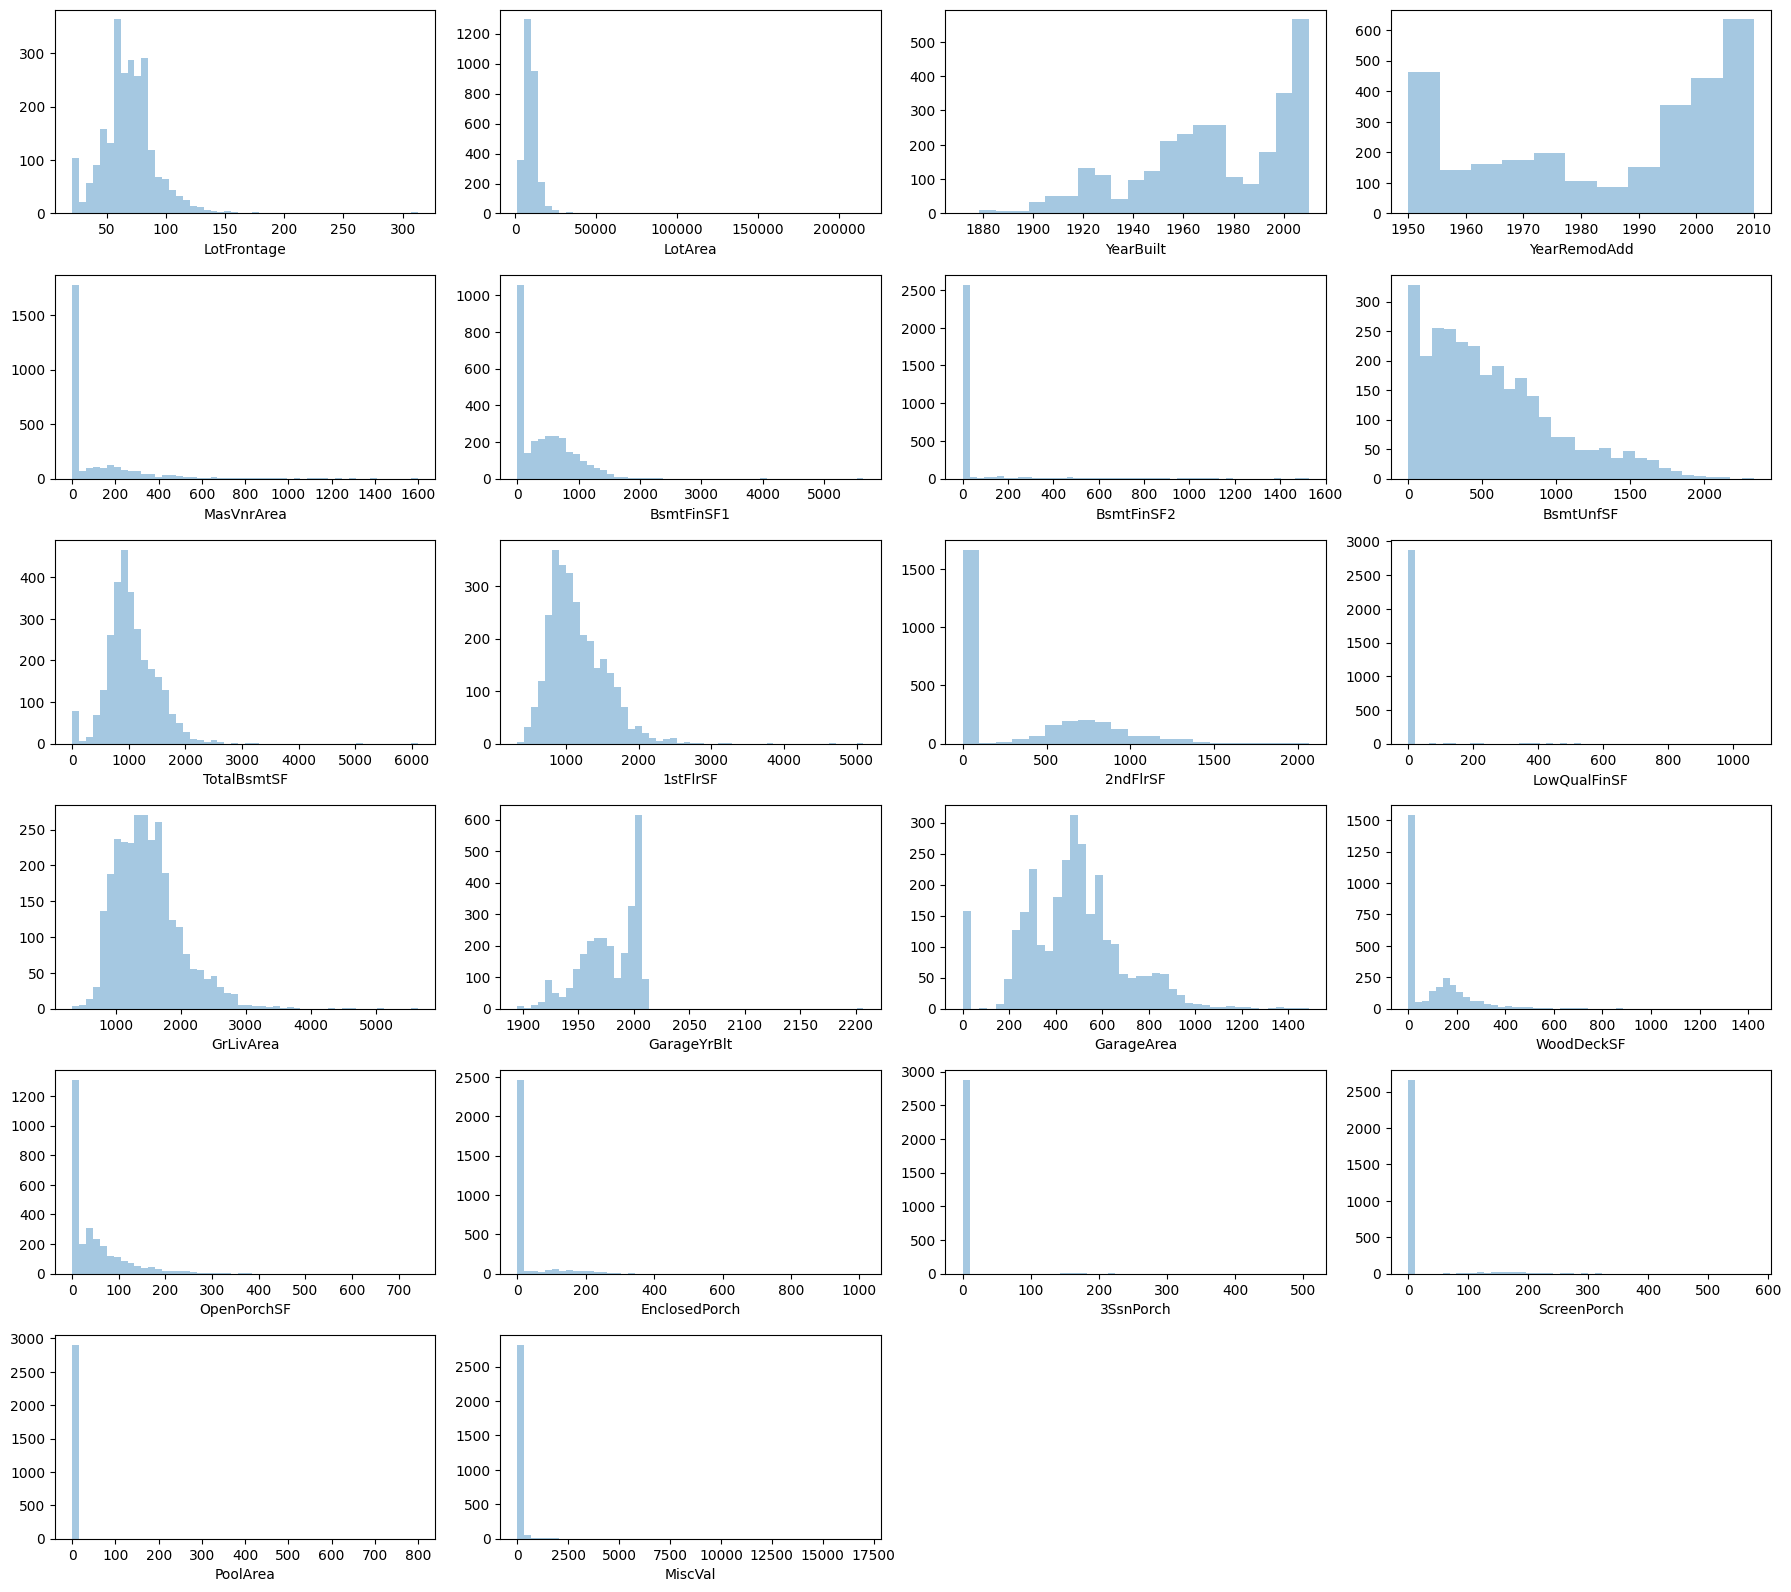

In [11]:
#Verilerin histogram grafiği olarak görselleştirilmesi
fig=plt.figure(figsize=(18,16))
for index,col in enumerate(cont_num_var):
  plt.subplot(6,4,index+1)
  sns.distplot(numeric_.loc[:,col].dropna(),kde=False)
fig.tight_layout(pad=1.0)

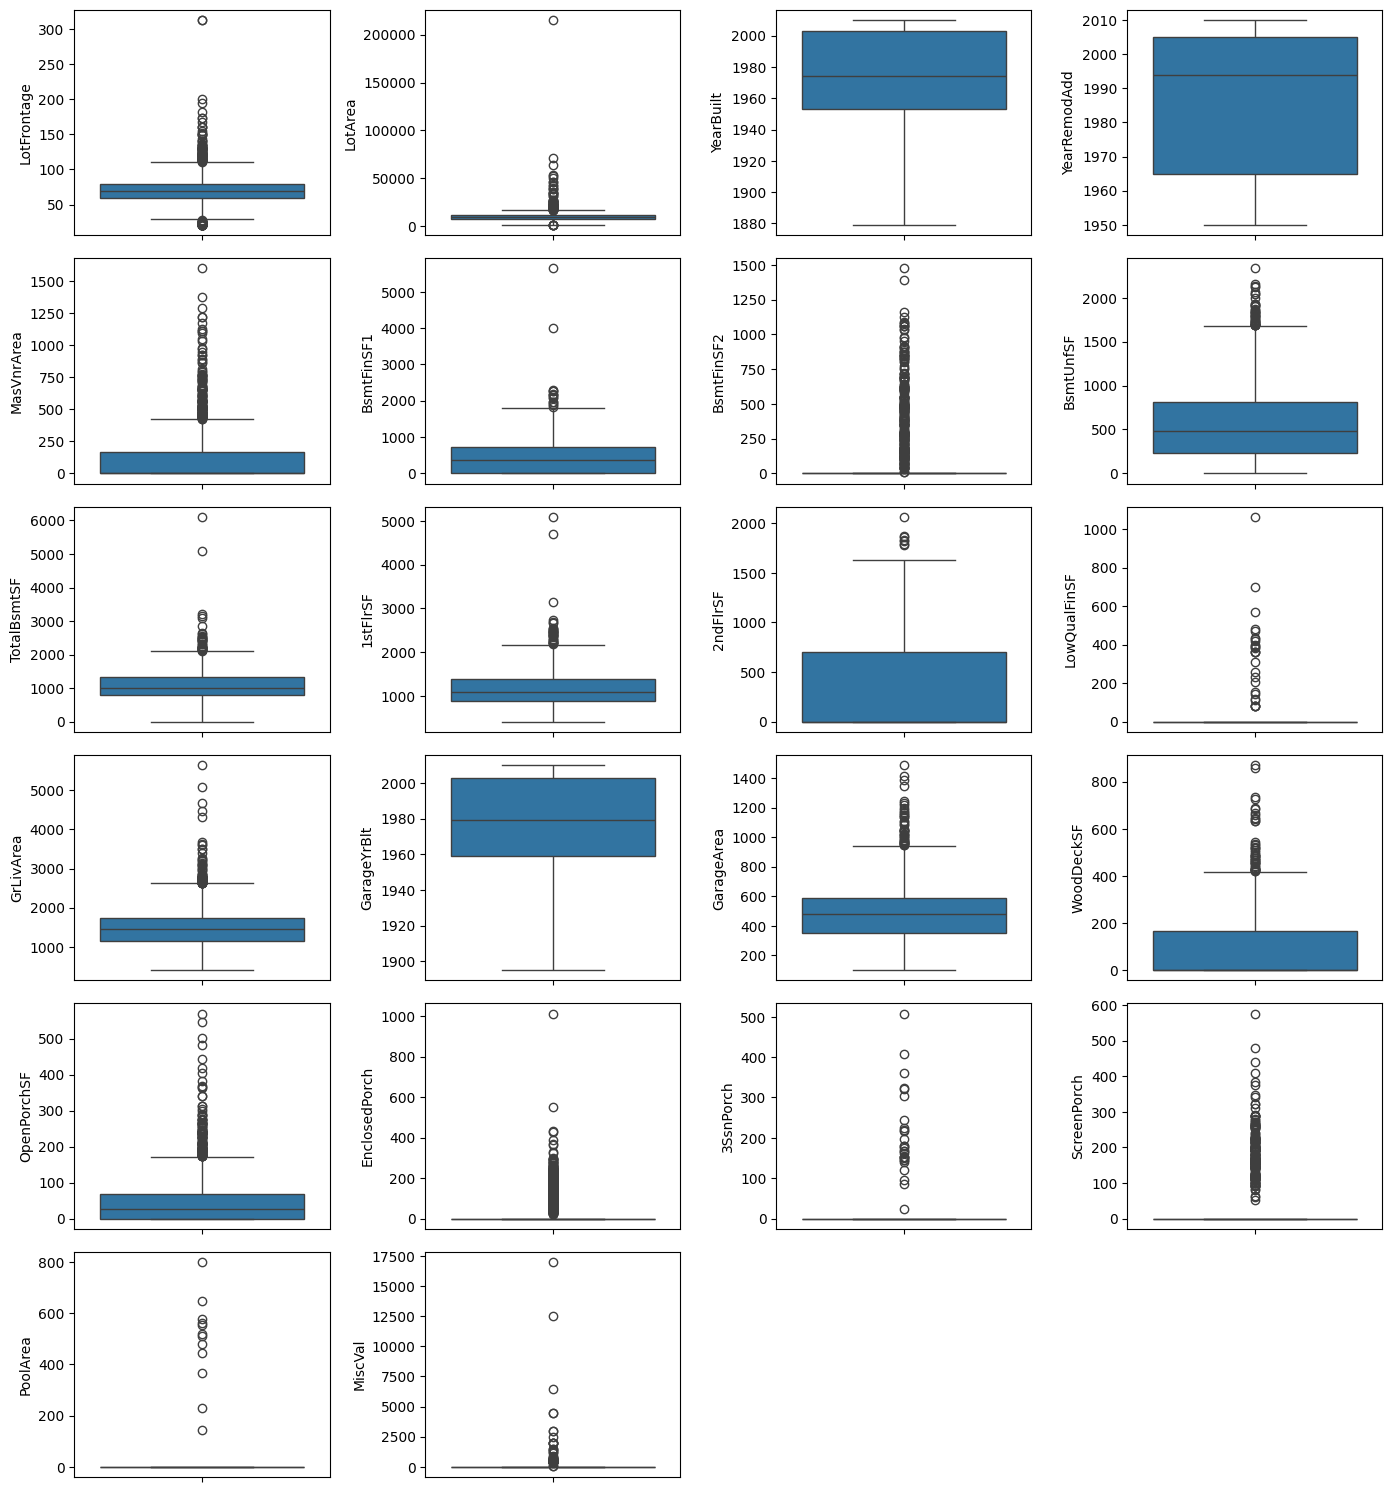

In [12]:
#Verilerin sutün grafiği olarak görselleştirilmesi
fig=plt.figure(figsize=(14,15))
for index,col in enumerate(cont_num_var):
  plt.subplot(6,4,index+1)
  sns.boxplot(y=col, data=numeric_.dropna())
fig.tight_layout(pad=1.0)

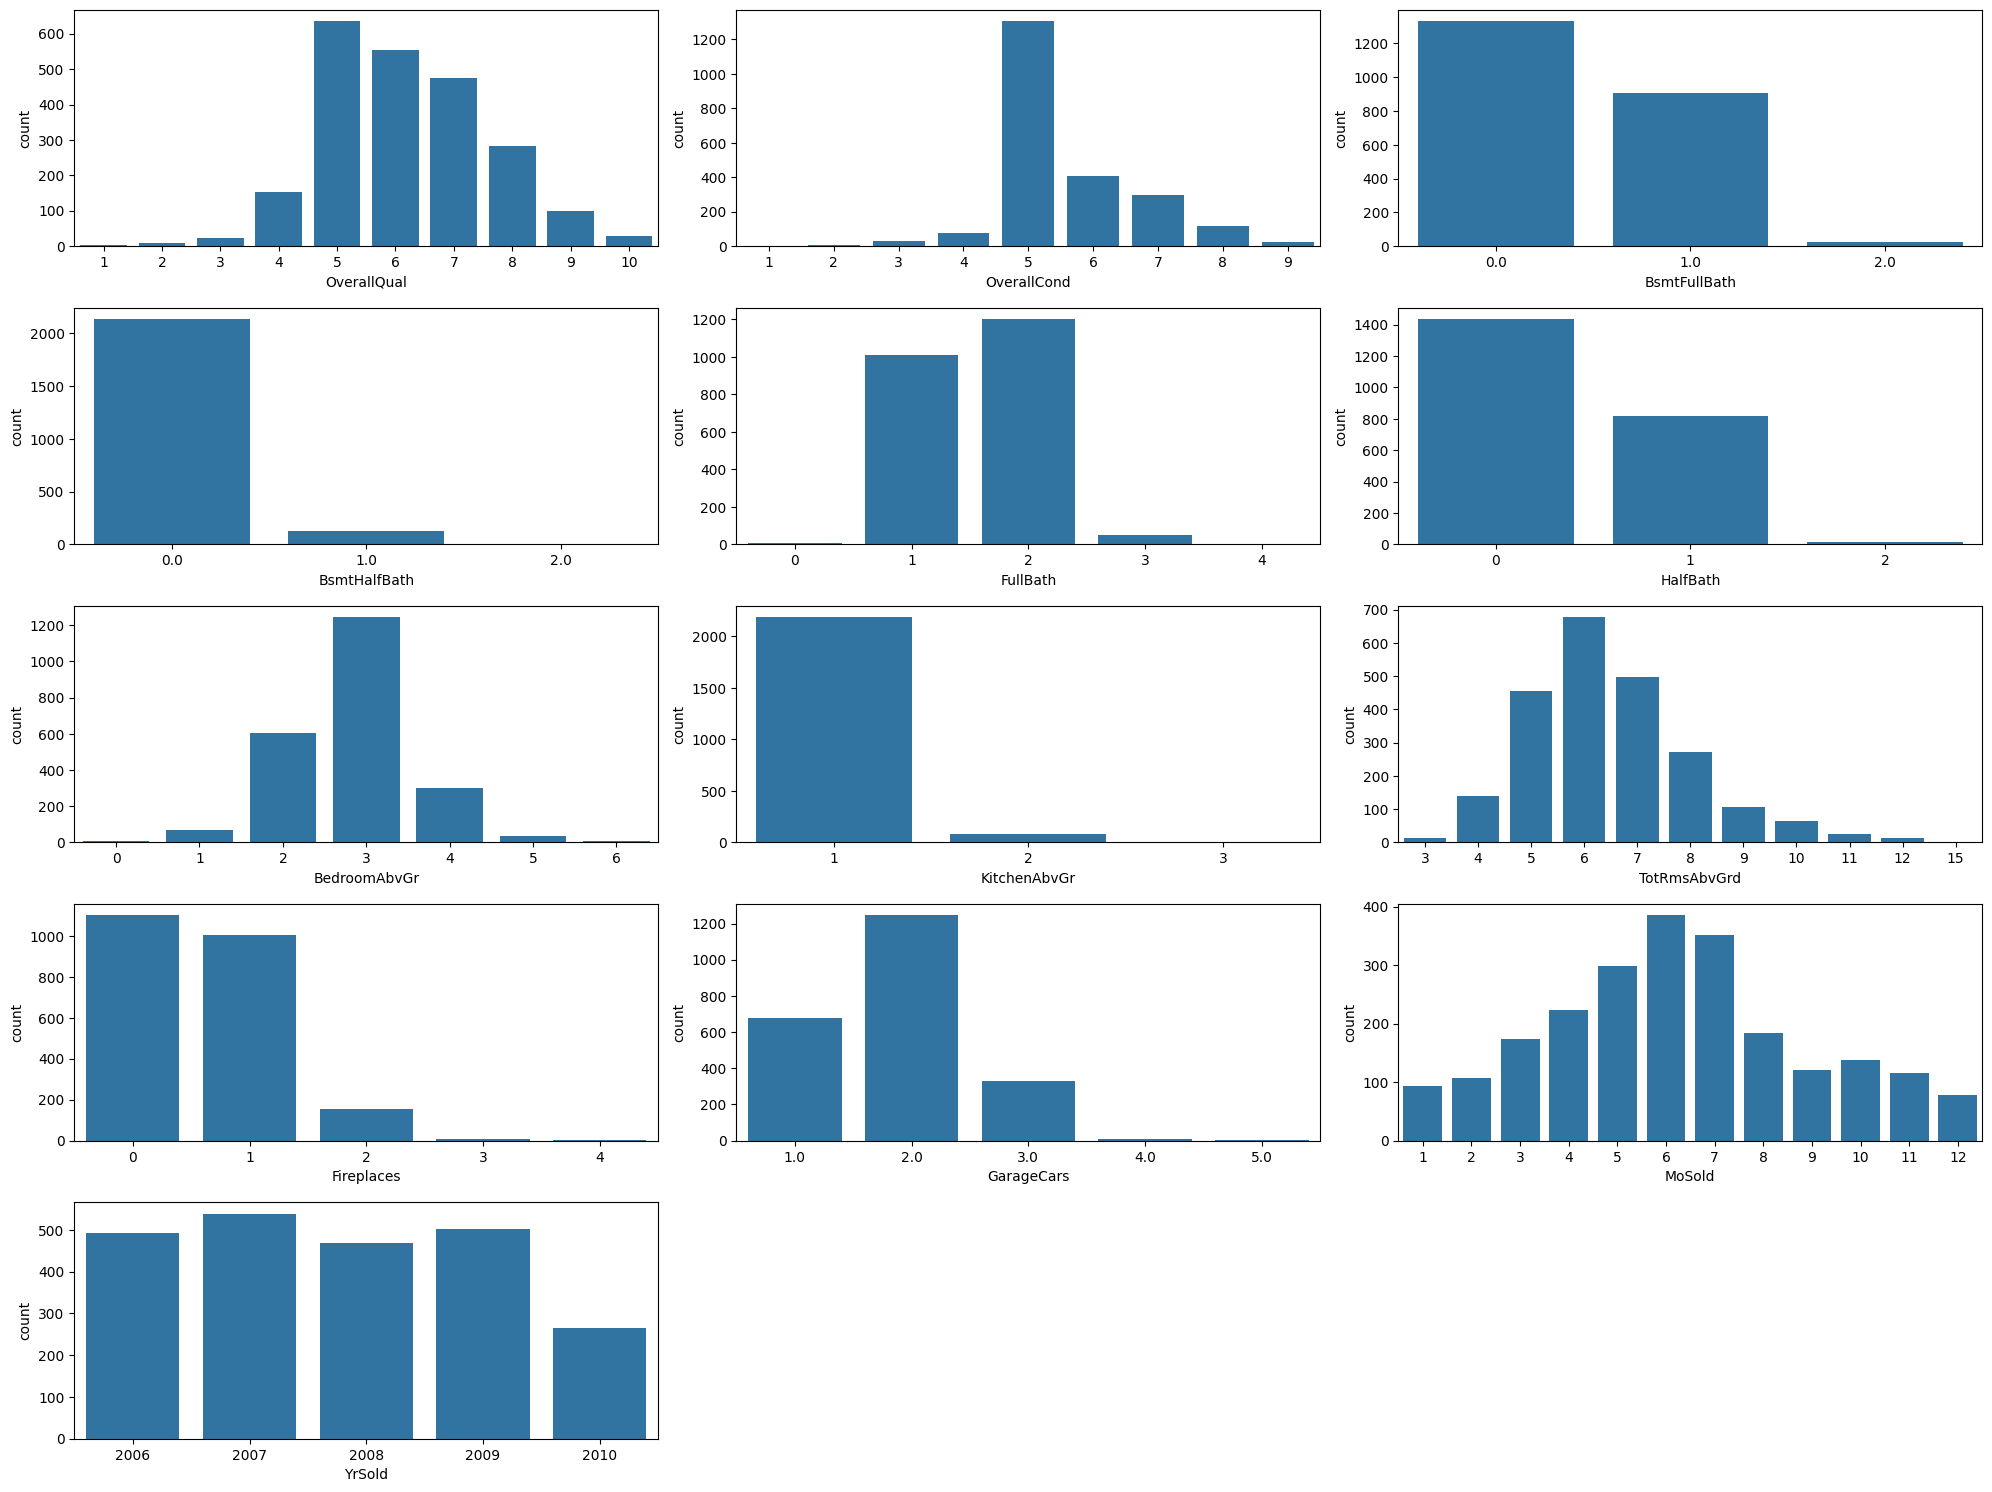

In [13]:
fig=plt.figure(figsize=(20,15))
for index,col in enumerate(disc_num_var):
  plt.subplot(5,3,index+1)
  sns.countplot(x=col,data=numeric_.dropna())
fig.tight_layout(pad=1.0)

# Kategorik Kolonların Görselleştirilmesi
- Utilities, Condition2 ağırlıklı olarak tek bir değerden oluştuğundan modelin öğrenmesine çok yararlı bir bilgi katmaz.

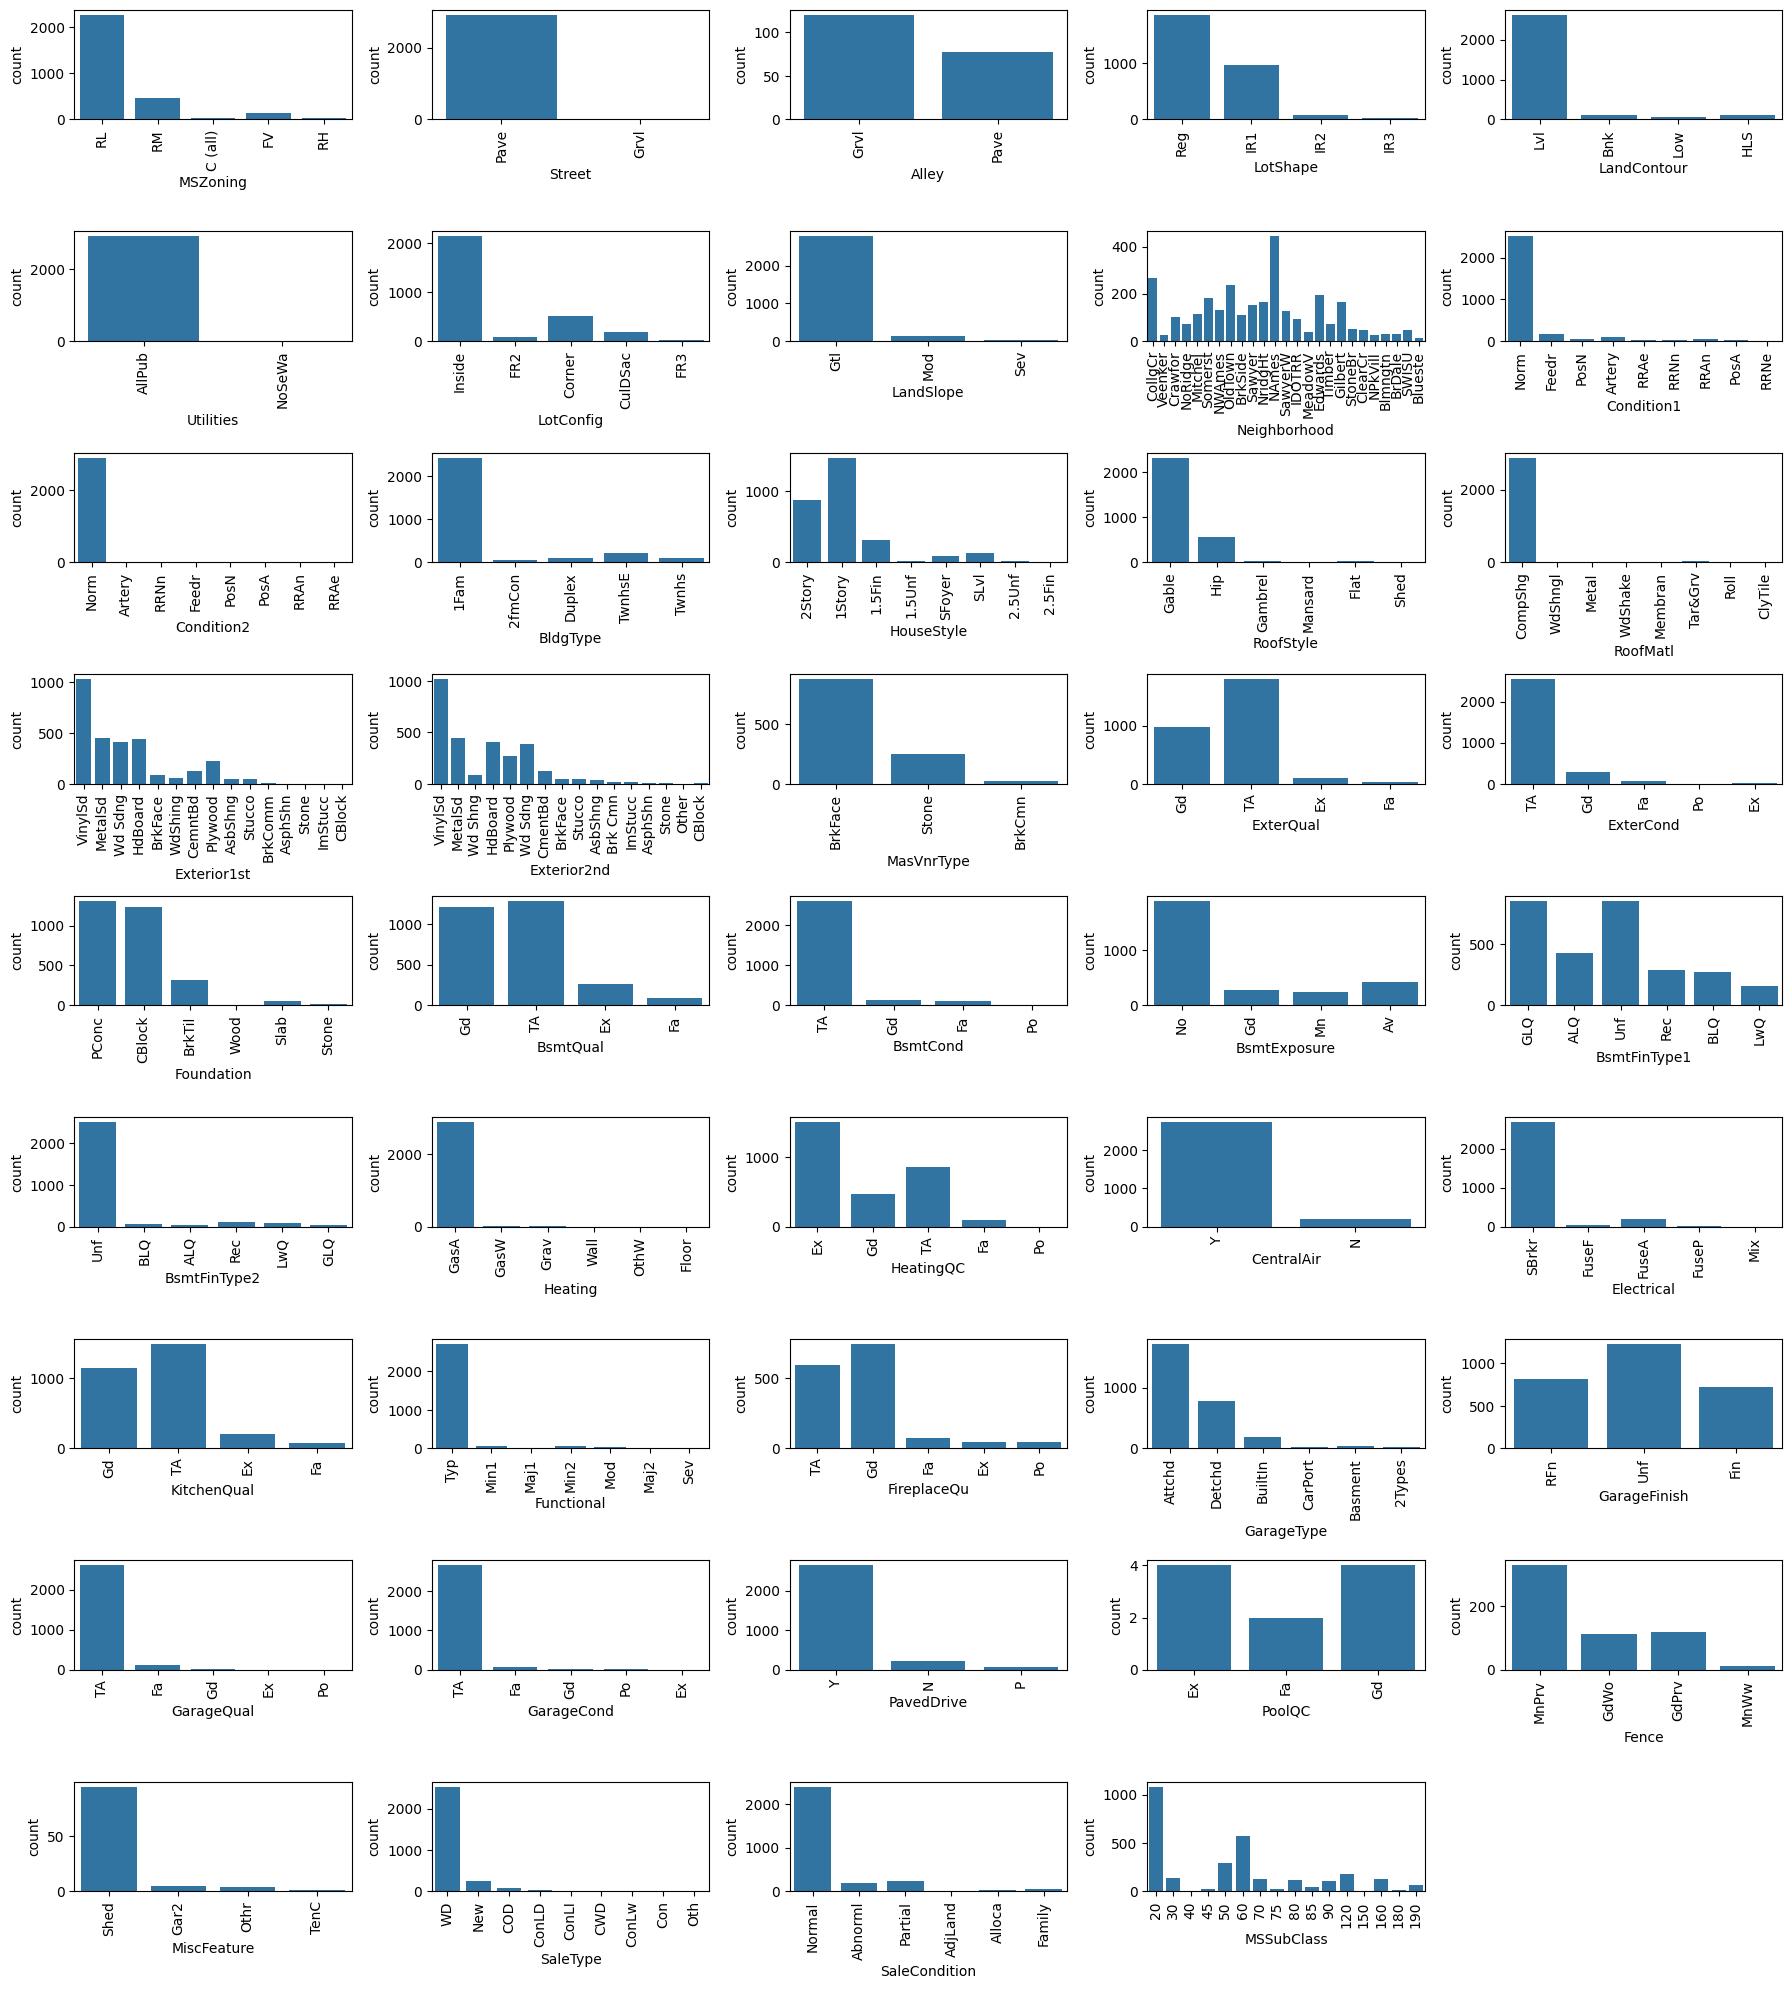

In [14]:
fig=plt.figure(figsize=(18,20))
for index in range(len(cat_train.columns)):
  plt.subplot(9,5,index+1)
  sns.countplot(x=cat_train.iloc[:,index],data=cat_train.dropna())
  plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

# **2.1) İki Değişkenli Analiz**

# Korelasyon Matrisi
* GarageYrBlt ve YearBuilt
* TotRmsAbvGrd ve GrLivArea
* 1stFlrSF ve TotalBsmtSF
* GarageArea ve GarageCars

Sütunlarının birbiri ile yüksek bir korelasyona(>=0.8) sahip olduğu görülür.

<Axes: >

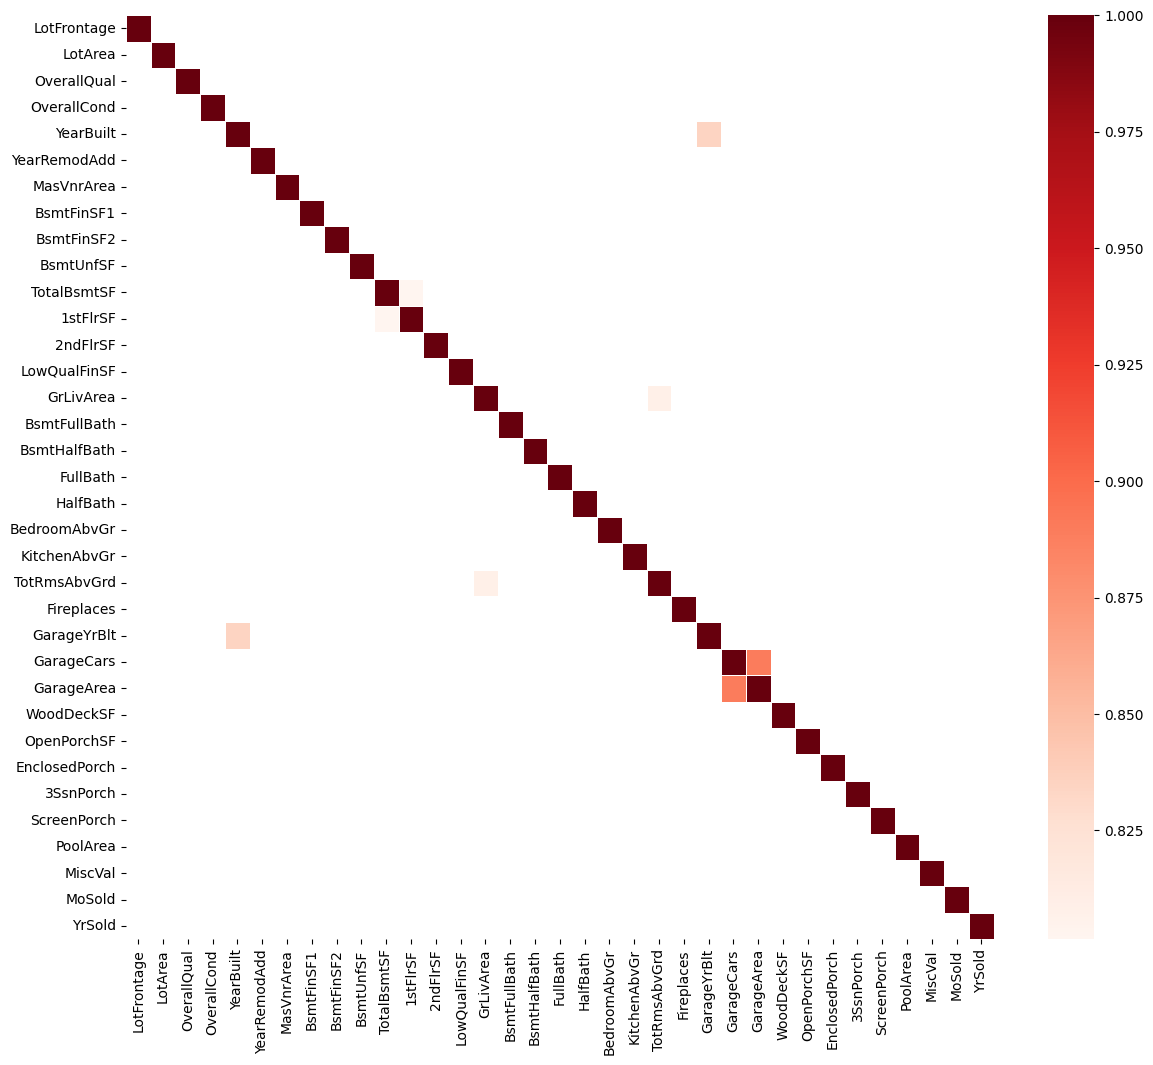

In [15]:
plt.figure(figsize=(14,12))
correlation=numeric_.corr()
sns.heatmap(correlation,mask=correlation<0.8,linewidth=0.5,cmap='Reds')

In [16]:
# SalePrice ilde diğer numerik kolonların korelasyonlarının araştırılması.
# SalePrice ile OverallQual ve GrLivArea 'nın yüksek korelasyonlu olduğu görülür.
numeric_train=train.select_dtypes(exclude=['object'])
correlation=numeric_train.corr()
correlation[['SalePrice']].sort_values(['SalePrice'],ascending=False)

SalePrice
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
ScreenPorch     0.111447
PoolArea        0.092404
MoSold          0.046432
3SsnPorch       0.044584
BsmtFinSF2     -0.011378
BsmtHalfBath   -0.016844
MiscVal        -0.021190
LowQualFinSF   -0.025606
YrSold         -0.028923
OverallCond    -0.077856
MSSubClass     -0.084284
EnclosedPorch  -0.128578
KitchenAbvGr   -0.135907

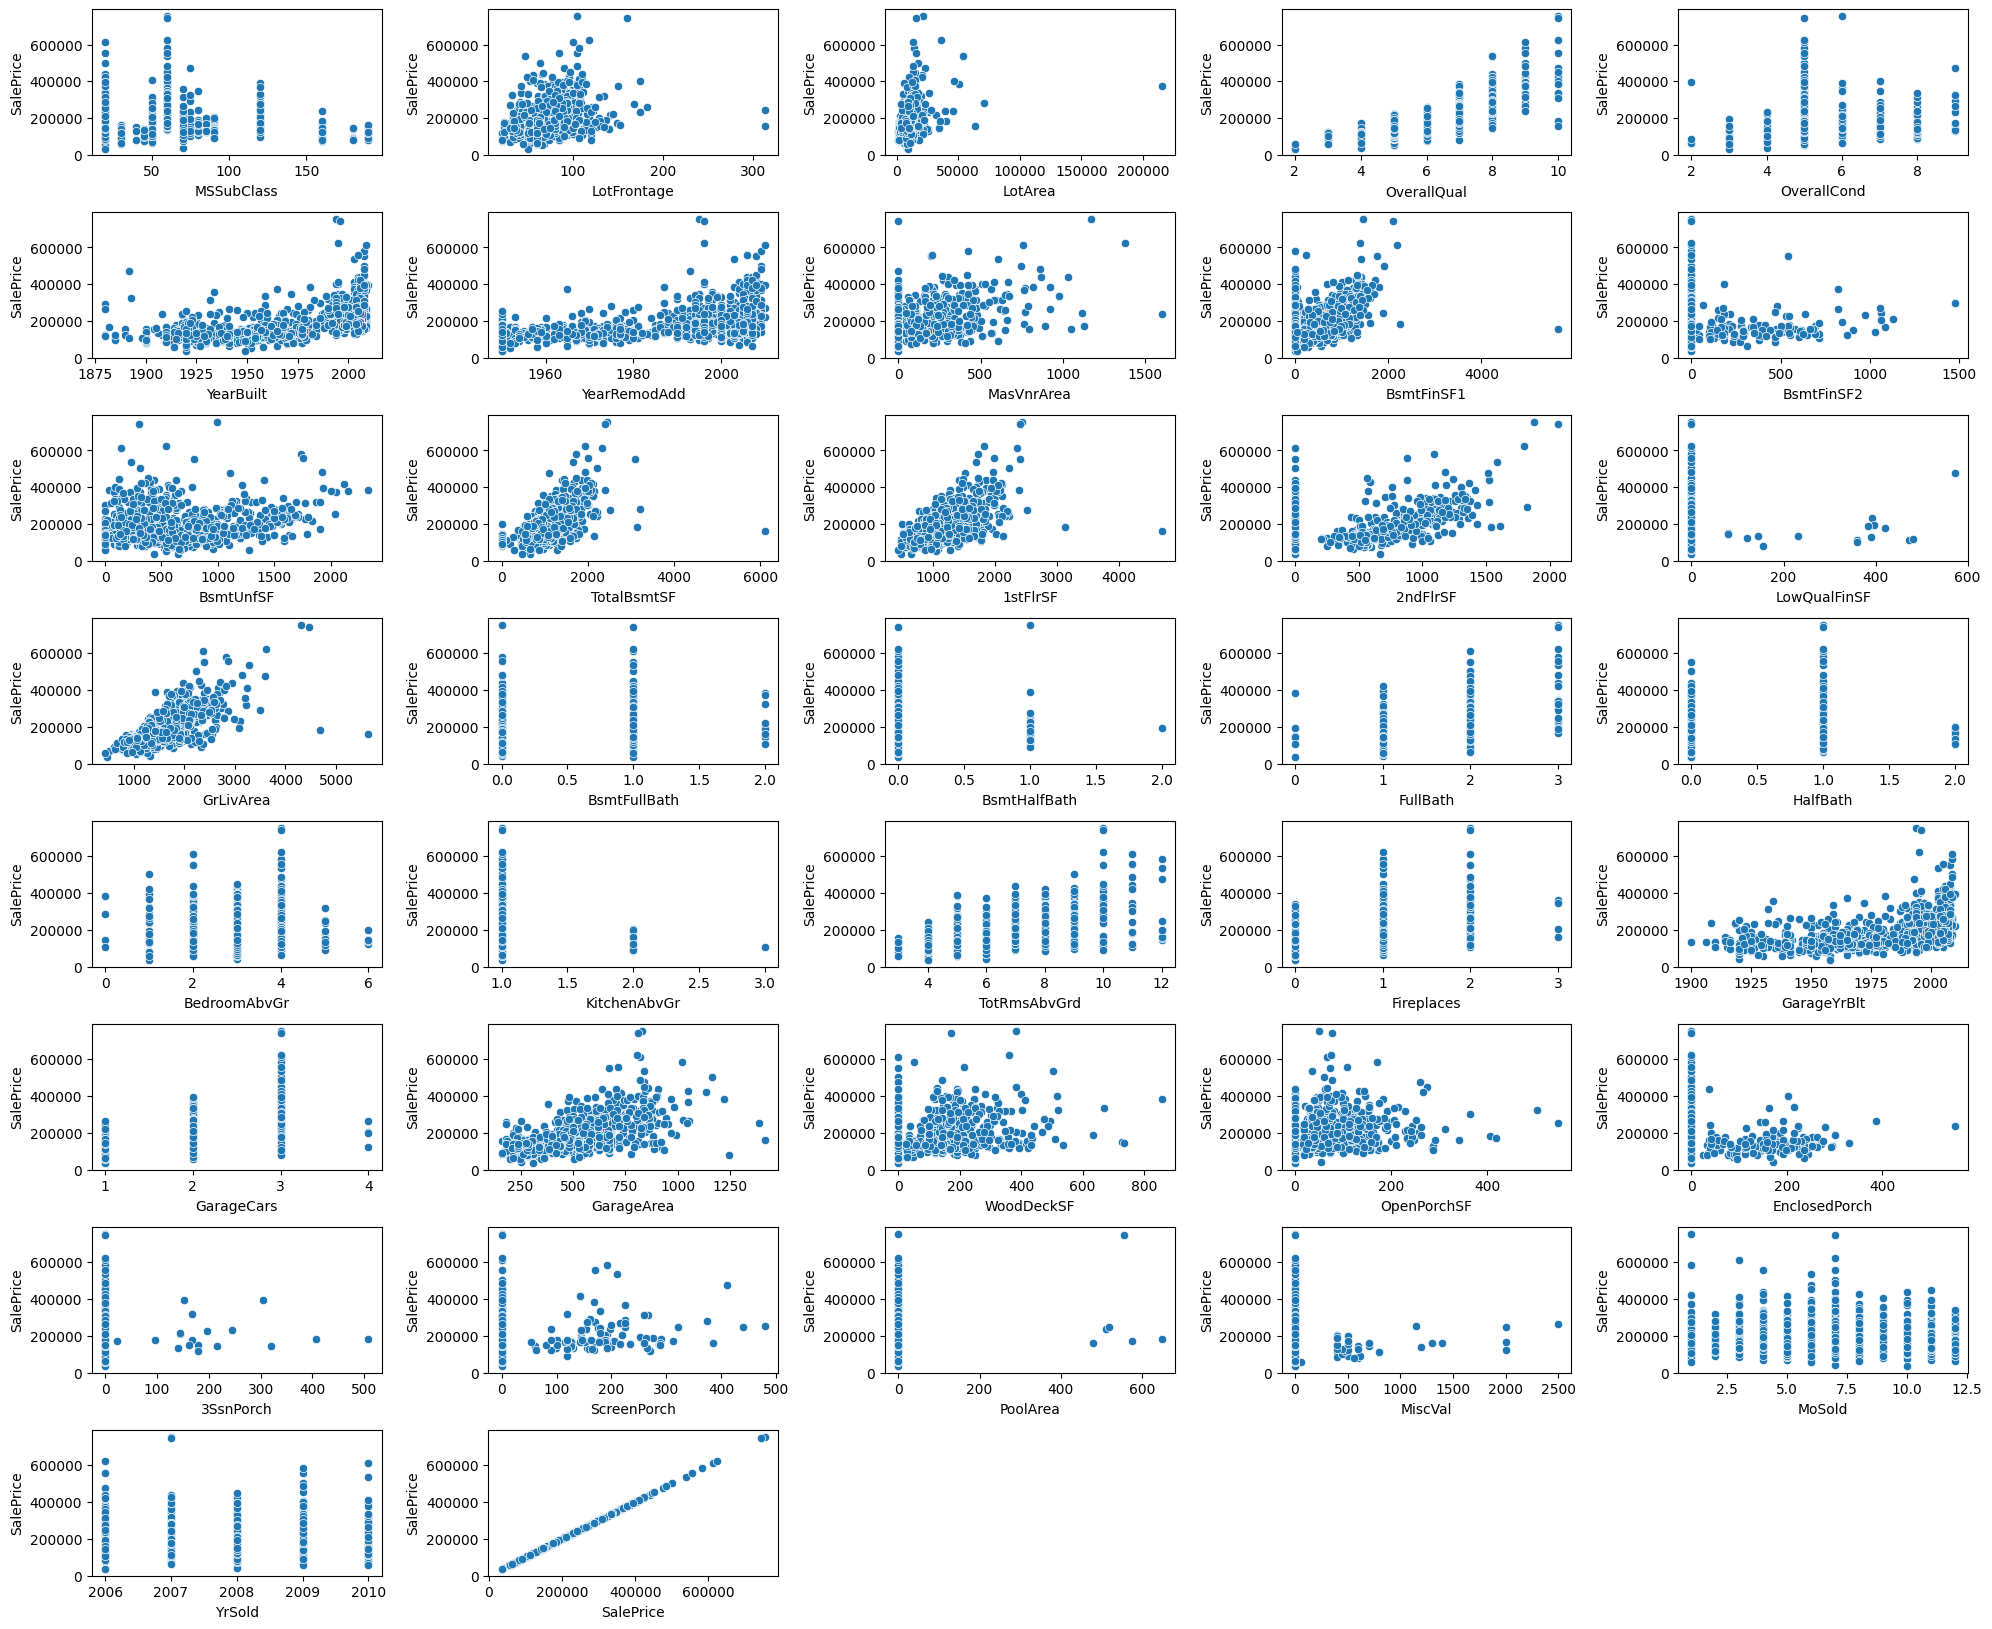

In [17]:
fig=plt.figure(figsize=(20,20))
for index in range(len(numeric_train.columns)):
  plt.subplot(10,5,index+1)
  sns.scatterplot(x=numeric_train.iloc[:,index],y='SalePrice',data=numeric_train.dropna())
fig.tight_layout(pad=1.0)

# **2) Veri Ön İşleme**

# 2-1)Removing Redundant Features


*   Çoklu doğrusallık(multicollinearity) problemini ortadan kaldırmak için yüksek korelasyonlu bazı özellikler kaldırıldı.
*   Çoklu doğrusallık: bir bağımsız değişkenin diğer bir veya birden fazla bağımsız değişkenle yüksek korelasyona sahip olması durumudur.Bu durum bir özelliğin etkisini izole etmeyi zorlaştırır.Çünkü model diğer özelliklerle de ilişkili olduğundan hangi özelliğin etkili olduğunu net bir şekilde ayırt edemez.



In [18]:
X.drop(['GarageYrBlt','TotRmsAbvGrd','1stFlrSF','GarageCars'],axis=1,inplace=True)


<Axes: title={'center': 'Number of missing rows'}, xlabel='features', ylabel='sum'>

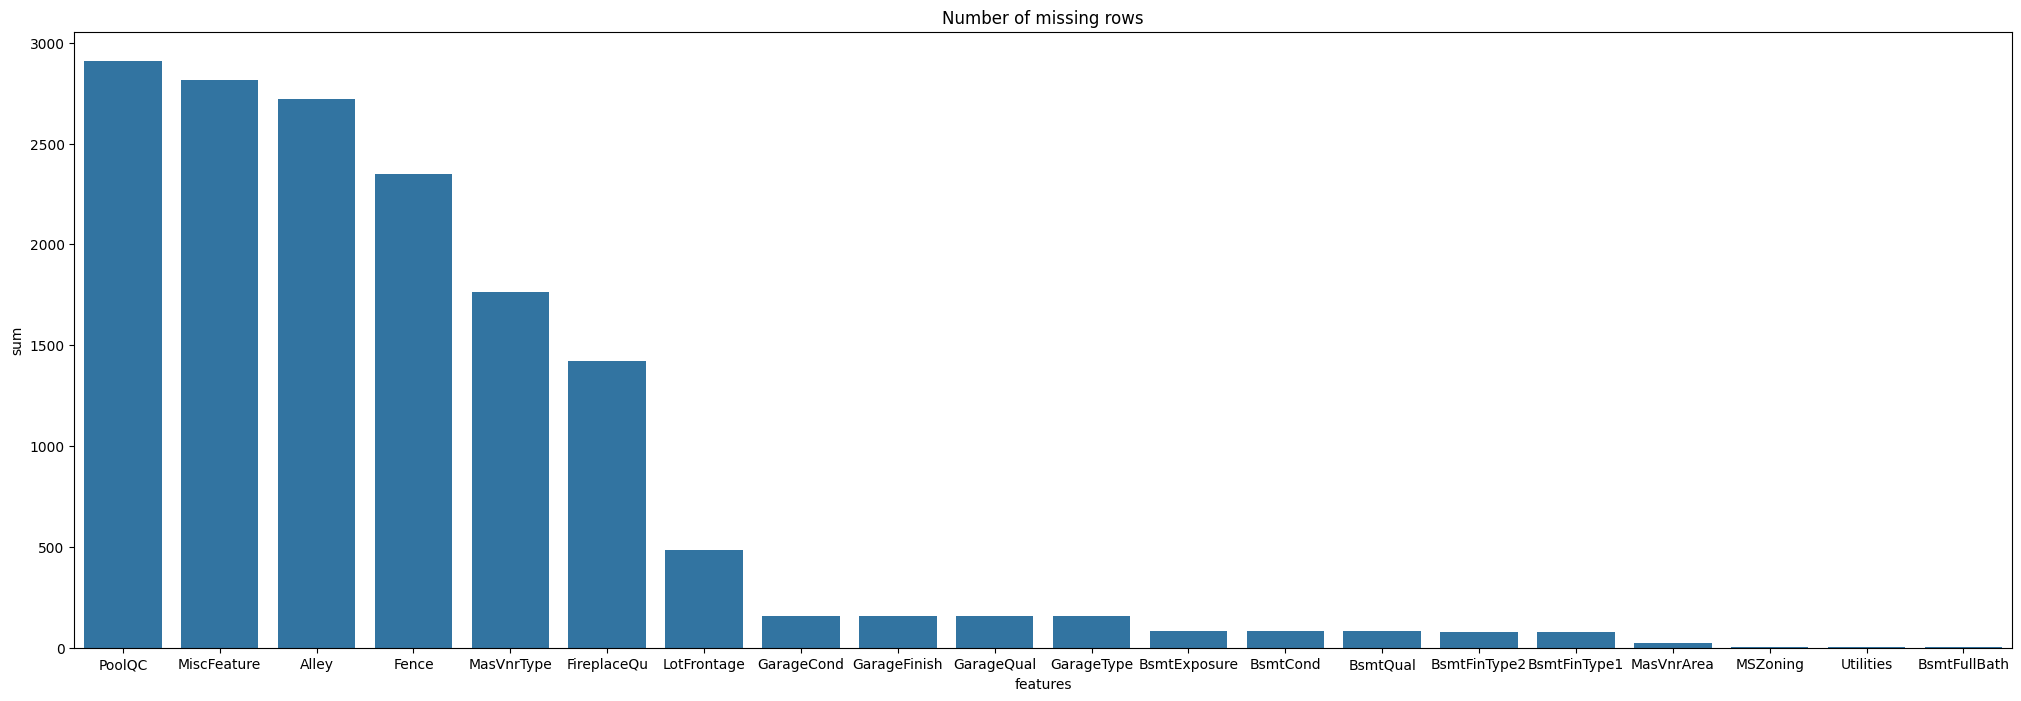

In [19]:
# X dataframe'indeki en yüksek boş değere sahip 20 kolonun kaç tane boş değer içerdiğini gösterir.
plt.figure(figsize=(25,8))
plt.title('Number of missing rows')
missing_count=pd.DataFrame(X.isnull().sum(),columns=['sum']).sort_values(by=['sum'],ascending=False).head(20).reset_index()
missing_count.columns=['features','sum']
sns.barplot(x='features',y='sum',data=missing_count)

In [20]:
# Bazı çok yüksek boş değer içeren sütunların dataframeden kaldırılması.
X.drop(['PoolQC','MiscFeature','Alley'],axis=1,inplace=True)

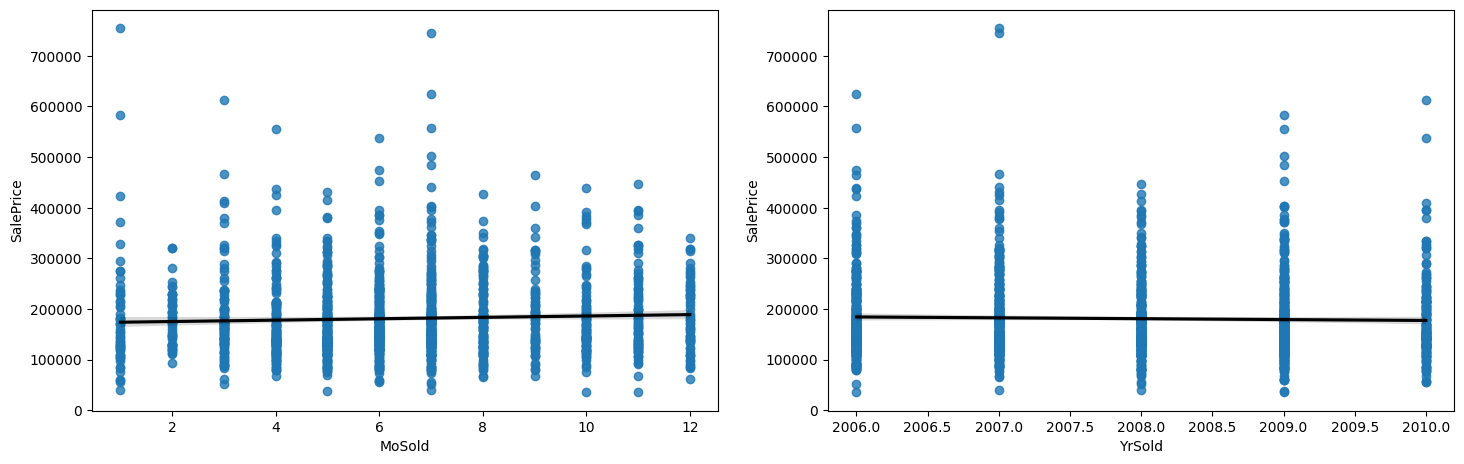

In [21]:
#'SalePrice kolonu ile 'MoSold' ve 'YrSold' kolonlarının birbirleriyle olan ilişkisinin görselleştirilmesi ve linner bir ilişkinin aranması.
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.regplot(x=numeric_train['MoSold'],y='SalePrice',data=numeric_train,ax=axes[0],line_kws={'color':'black'})
sns.regplot(x=numeric_train['YrSold'],y='SalePrice',data=numeric_train,ax=axes[1],line_kws={'color':'black'})
fig.tight_layout(pad=2.0)

In [22]:
correlation[['SalePrice']].sort_values(['SalePrice'],ascending=False).tail(11)

SalePrice
MoSold          0.046432
3SsnPorch       0.044584
BsmtFinSF2     -0.011378
BsmtHalfBath   -0.016844
MiscVal        -0.021190
LowQualFinSF   -0.025606
YrSold         -0.028923
OverallCond    -0.077856
MSSubClass     -0.084284
EnclosedPorch  -0.128578
KitchenAbvGr   -0.135907

In [23]:
#Yukarıdaki liste değerlerinden de görüleceği üzere aşağıda düşürülen her iki kolonun 'SalePrice' kolonu ile bir lineer ilişkisi yoktur.
X.drop(['MoSold','YrSold'],axis=1,inplace=True)

In [24]:
#kategorik veriler için
#Tek değişkenli analizde bazı sütun değerlerinin büyük miktarda tek değerden oluştuğunu görmüştük.Bu sütunlar bizim için yararlı olmadığından %96 dan fazla aynı değeri içeren sütunları düşürdük

cat_col=X.select_dtypes(include=['object']).columns
overfit_cat=[]
for i in cat_col:
  counts=X[i].value_counts()
  zeros=counts.iloc[0]
  if zeros/len(X)*100>96:
    overfit_cat.append(i)
overfit_cat=list(overfit_cat)
X=X.drop(overfit_cat,axis=1)

In [25]:
#Numerik veriler için
num_col=X.select_dtypes(exclude=['object']).drop(['MSSubClass'],axis=1).columns
overfit_num=[]
for i in num_col:
  counts=X[i].value_counts()
  zeros=counts.iloc[0]
  if zeros/len(X)*100>96:
    overfit_num.append(i)
overfit_num=list(overfit_num)
X=X.drop(overfit_num,axis=1)

In [26]:
print("%96'dan fazla aynı değere sahip olan kategorik kolonlar",overfit_cat)
print("%96'dan fazla aynı değere sahip olan numerik kolonlar",overfit_num)


%96'dan fazla aynı değere sahip olan kategorik kolonlar ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']
%96'dan fazla aynı değere sahip olan numerik kolonlar ['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']


# 2.2) Aykırı Değerler ile Baş Etme
- Aykırı değerler model performansını olumsuz yönde etkileyebilir o yüzden kaldırılması daha doğrudur.

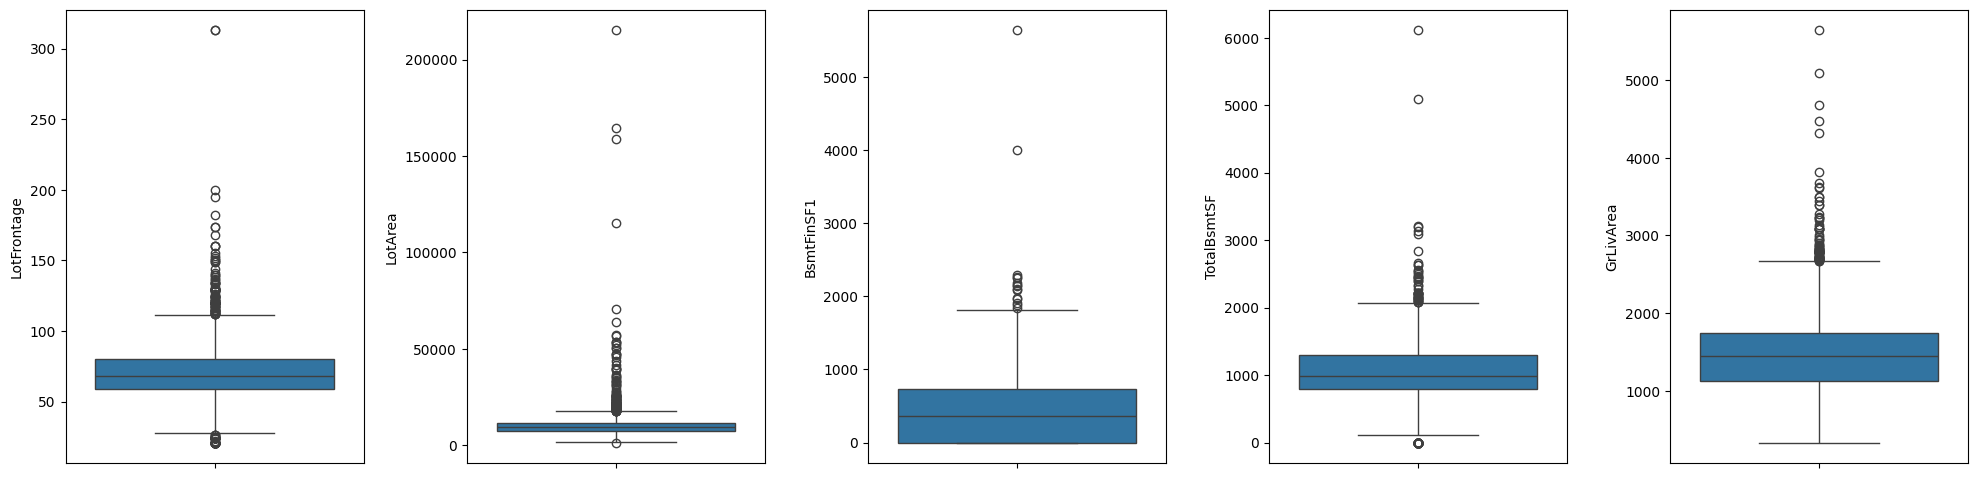

In [27]:
out_col=['LotFrontage','LotArea','BsmtFinSF1','TotalBsmtSF','GrLivArea']
fig=plt.figure(figsize=(20,5))
for index,col in enumerate(out_col):
  plt.subplot(1,5,index+1)
  sns.boxplot(y=col,data=X)
fig.tight_layout(pad=1.5)


In [28]:
# Her bir kolonun belli bir eşik değerinin üzerindeki aykırı değerler veri setinden atılıyor.
train=train.drop(train[train['LotFrontage']>200].index)
train=train.drop(train[train['LotArea']>100000].index)
train=train.drop(train[train['BsmtFinSF1']>4000].index)
train=train.drop(train[train['TotalBsmtSF']>5000].index)
train=train.drop(train[train['GrLivArea']>4000].index)

In [29]:
X.shape

(2919, 61)

# 2.3) Eksik Değerlerin Doldurulması

In [30]:
pd.DataFrame(X.isnull().sum(),columns=['sum']).sort_values(by=['sum'],ascending=False).head(15)

sum
Fence         2348
MasVnrType    1766
FireplaceQu   1420
LotFrontage    486
GarageCond     159
GarageQual     159
GarageFinish   159
GarageType     157
BsmtExposure    82
BsmtCond        82
BsmtQual        81
BsmtFinType2    80
BsmtFinType1    79
MasVnrArea      23
MSZoning         4

**Sıralı Verilerin Doldurulması**

*  Sıralı eksik verileri NA ile dolduracağız. Daha sonra bu değerlere aralarında derecelendirme olacak şekilde değerler atayacağız.



In [31]:
#Sıralı Eksik Verilerin Doldurulması
# Sıralı eksik verileri NA ile dolduracağız.

cat=['GarageType','GarageFinish','BsmtFinType2','BsmtExposure','BsmtFinType1',
     'GarageCond','GarageQual','BsmtCond','BsmtQual','FireplaceQu','Fence','KitchenQual','HeatingQC','ExterQual','ExterCond']

X[cat]=X[cat].fillna('NA')

**Kategorik Verilerin Doldurulması**

*  Kategorik veriler, 'Neighborhood' sütunundaki değerleri gruplayarak bu sütundaki en çok tekrar eden değer ile eksik veriler  dolduruluyor.

In [32]:
#Kategorik Verilerin Doldurulması
#Kategorik veriler, 'Neighborhood' sütunundaki değerleri gruplayarak en çok tekrar eden değerle dolduruluyor.
#Aynı mahalledeki diğer evlerin o stüunda en sık sahip olduğu değer ile eksik veriler dolduruluyor.

cols=["MasVnrType","MSZoning","Exterior1st","Exterior2nd","SaleType","Electrical","Functional"]
X[cols]=X.groupby("Neighborhood")[cols].transform(lambda x: x.fillna(x.mode()))




**Numerik Değerlerin Doldurulması**
*  İlgili değerler 'Neighborhood' sütununa göre gruplandırılarak sütundaki değerlerin ortalaması alınıyor ve ilgili eksik değerler hesaplanan ortalama ile dolduruluyor.




<Axes: xlabel='Neighborhood', ylabel='GarageArea_mean'>

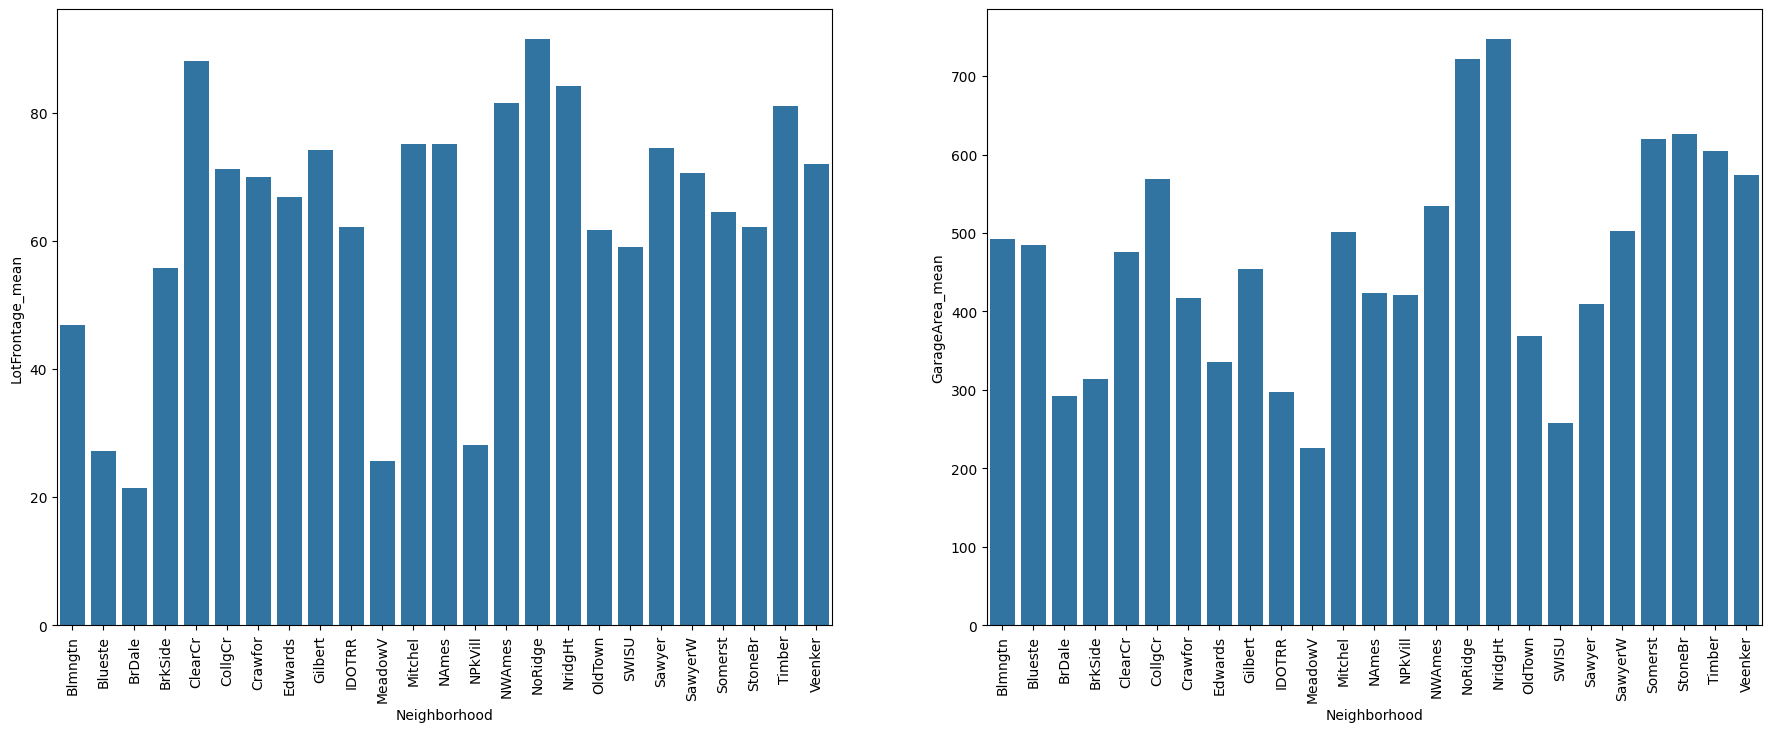

In [33]:
#'Neihgborhood' sütunundaki değerlerin 'LotFrontage' ve 'GarageArea' değerlerinin ortalaması alınarak görselleştiriliyor.
neigh_lot=X.groupby('Neighborhood')['LotFrontage'].mean().reset_index(name='LotFrontage_mean')
neigh_garage=X.groupby('Neighborhood')['GarageArea'].mean().reset_index(name='GarageArea_mean')

fig, axes=plt.subplots(1,2,figsize=(22,8))
axes[0].tick_params(axis='x',rotation=90)
sns.barplot(x='Neighborhood',y='LotFrontage_mean',data=neigh_lot,ax=axes[0])
axes[1].tick_params(axis='x',rotation=90)
sns.barplot(x='Neighborhood',y='GarageArea_mean',data=neigh_garage,ax=axes[1])


In [34]:
#Boş değerler her 'Neigborhood' değerinin 'LotFrontage' değerinin ortalaması ile dolduruluyor.
#Boş değerler her 'Neigborhood' değerinin 'GarageArea' değerinin ortalaması ile dolduruluyor.
#Eksik 'MSZoning' bilgisi 'MSSubClass''daki en yaygın 'MSZoning' bilgisi ile dolduruluyor.

X['LotFrontage']=X.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
X['GarageArea']=X.groupby('Neighborhood')['GarageArea'].transform(lambda x: x.fillna(x.mean()))
X['MSZoning']=X.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()))


In [35]:
#Aşağıdaki sütunlardaki eksik değerler her bir sütunun ortalaması ile dolduruluyor.
cont=["BsmtHalfBath","BsmtFullBath","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","MasVnrArea"]
X[cont]=X[cont].fillna(X[cont].mean())

In [36]:
#'MSSubClass' sütunun tipi integerdan stringe çevriliyor.
X['MSSubClass']=X['MSSubClass'].apply(str)

**Sıralı Özelliklerin Haritalanması**

* Kolonlardaki kategorik olarak sıralı değerlere numerik değerlerin atanması.



In [37]:
ordinal_map={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
fintype_map={'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0}
expose_map={'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0}
fence_map={'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'NA':0}

In [38]:
#Sıralı kategorik değerlere numerik değerler atanıyor.

ord_col=['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond','FireplaceQu']

for col in ord_col:
  X[col]=X[col].map(ordinal_map)

fin_col=['BsmtFinType1','BsmtFinType2']

for col in fin_col:
  X[col]=X[col].map(fintype_map)

X['BsmtExposure']=X['BsmtExposure'].map(expose_map)
X['Fence']=X['Fence'].map(fence_map)

# **3) Özellik Mühendisliği**

* Özellik Mühendisliği, Modelimizin başarım performansını arttırmak amacıyla mevcut özelliklerden yeni özelliklerin çıkarılmasıdır.



Toplam arazi alanı değerini ekleyebiliriz.
*  TotalLot = LotFrontage + LotArea

Evin toplam metrekare bilgisini ekleyebiliriz.
*  TotalSF = TotalBsmtSF + 2ndFlrSF

Evin toplam banyo sayısı bilgisini ekleyebiliriz.
*  TotalBath = FullBath + HalfBath

Evin toplam veranda alanı bilgisini ekleyebiliriz.
*  TotalPorch = OpenPorchSF + EnclosedPorch + ScreenPorch

Evin toplam bodrum alanı bilgisini ekleyebiliriz.
*  TotalBsmtFin = BsmtFinSF1 + BsmtFinSF2

In [39]:
X['TotalLot']=X['LotFrontage']+X['LotArea']
X['TotalBsmtFin']=X['BsmtFinSF1']+X['BsmtFinSF2']
X['TotalSF']=X['TotalBsmtSF']+X['2ndFlrSF']
X['TotalBath']=X['FullBath']+X['HalfBath']
X['TotalPorch']=X['OpenPorchSF']+X['EnclosedPorch']+X['ScreenPorch']


In [40]:
# Diğer geriye kalan kategorik kolonların numerik hale çevrilmesi
X=pd.get_dummies(X)

 **'SalePrice' Kolonunun Dağılımı**

* Dağılımın sağ kuyruğu sol kuyruğundan uzundur ve ortalama moddan büyüktür bu durum pozitif çarpıklık olarak adlandırılır.

* Çarpık bir hedefe sahip olmak modelin performansını etkileyeceğinden çarpıklık etkisini minimize etmek için 'log dönüşümü' kullanılıyor.


C:\Users\besse\AppData\Local\Temp\ipykernel_23460\1030306687.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dist=sns.distplot(train['SalePrice'],fit=norm)


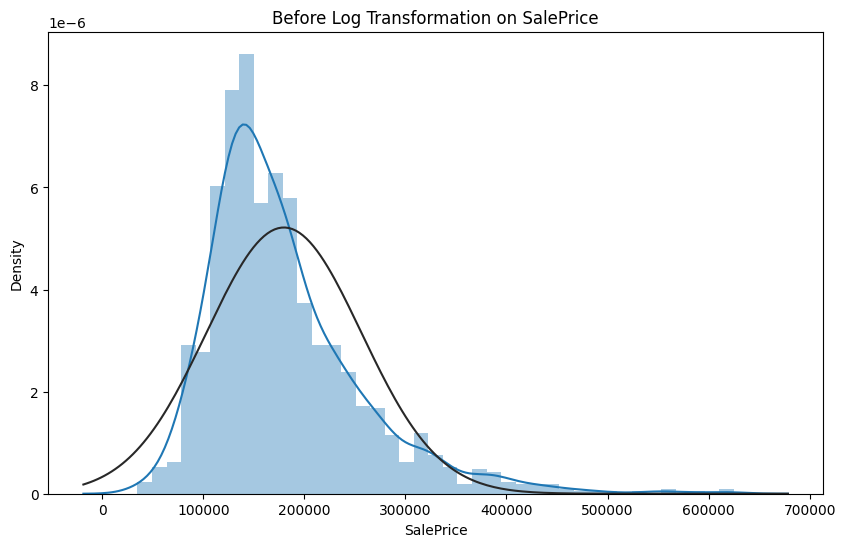

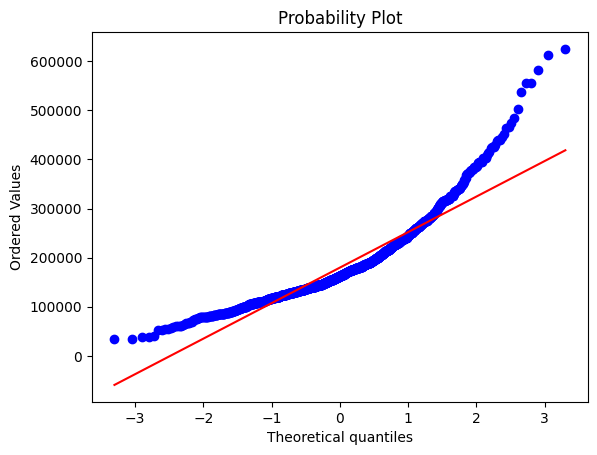

In [41]:
plt.figure(figsize=(10,6))
plt.title("Before Log Transformation on SalePrice")
dist=sns.distplot(train['SalePrice'],fit=norm)
plt.show()
#'SalePrice' kolonundaki verilerin normal dağılıma uyup uymadığının kontrolü
res=stats.probplot(train['SalePrice'],plot=plt)

C:\Users\besse\AppData\Local\Temp\ipykernel_23460\3162698126.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dist=sns.distplot(train['SalePrice'],fit=norm)


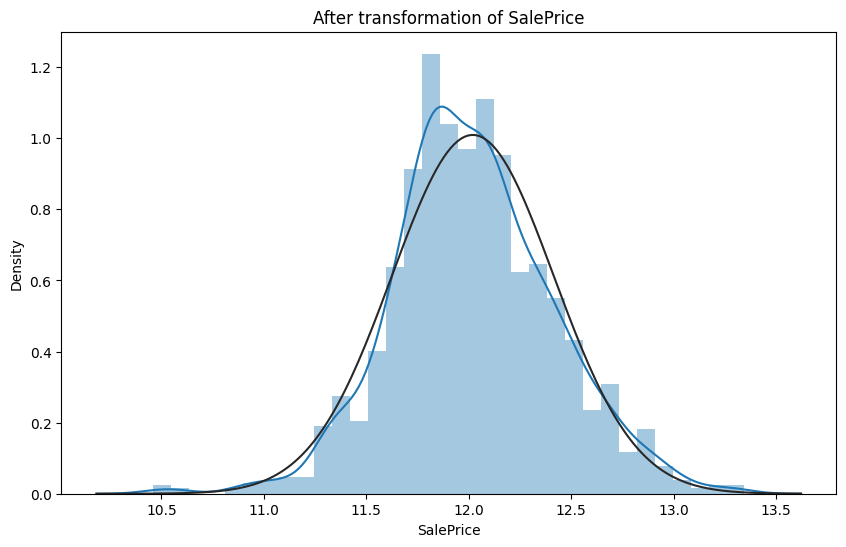

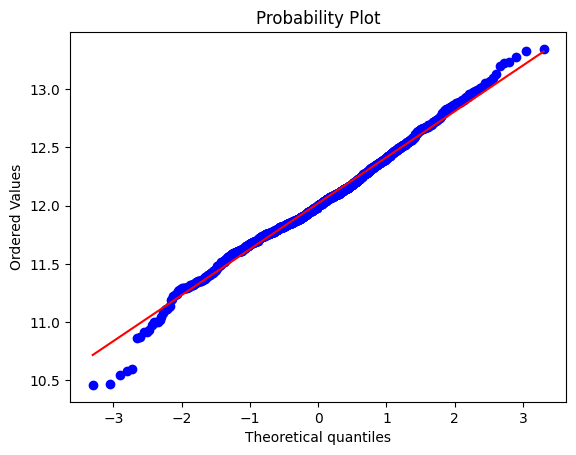

In [42]:
plt.figure(figsize=(10,6))
plt.title("After transformation of SalePrice")
train['SalePrice']=np.log(train['SalePrice'])
dist=sns.distplot(train['SalePrice'],fit=norm)
plt.show()
#'SalePrice' kolonundaki verilerin normal dağılıma uyup uymadığının kontrolü
res=stats.probplot(train['SalePrice'],plot=plt)

C:\Users\besse\AppData\Local\Temp\ipykernel_23460\565036567.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['GrLivArea'],fit=norm)


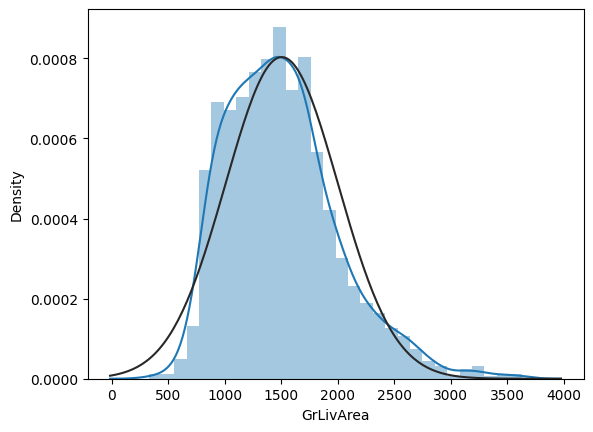

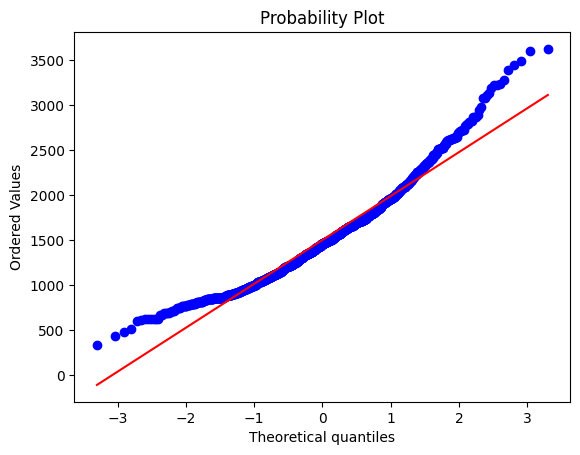

In [43]:
sns.distplot(train['GrLivArea'],fit=norm)
fig=plt.figure()
res=stats.probplot(train['GrLivArea'],plot=plt)

C:\Users\besse\AppData\Local\Temp\ipykernel_23460\2873646163.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['GrLivArea'],fit=norm)


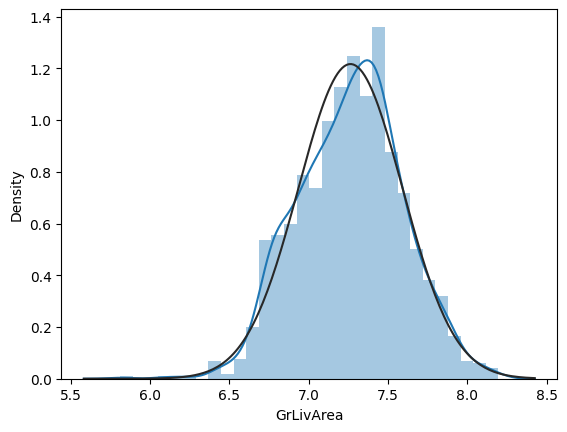

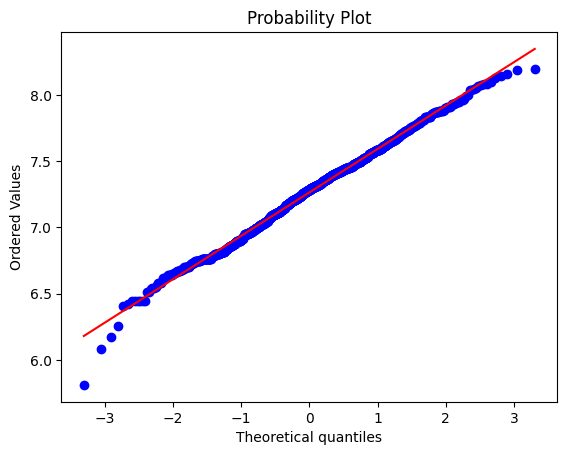

In [44]:
train['GrLivArea']=np.log(train['GrLivArea'])
sns.distplot(train['GrLivArea'],fit=norm)
fig=plt.figure()
res=stats.probplot(train['GrLivArea'],plot=plt)

# **4) Modelleme**

In [45]:
#Train-test değerlerinin ilgili değişkenlere aktarılması.
x=X.loc[train.index]
y=y.loc[train.index]
test=X.loc[test.index]

In [46]:
pd.DataFrame(test.isnull().sum(),columns=['sum']).sort_values(by=['sum'],ascending=False).head(15)

sum
LotFrontage     0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
ExterQual       0
ExterCond       0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0

Robust Scaler, outlier değerlerden etkilenmeyen bir ölçekleme metotudur.Verileri ölçeklerken medyan ve çeyrekler arası aralık gibi istatiksel ölçümleri kullanır.

In [47]:

from sklearn.preprocessing import RobustScaler

cols=X.select_dtypes(np.number).columns
transformer=RobustScaler().fit(x[cols])
x[cols]=transformer.transform(x[cols])
test[cols]=transformer.transform(test[cols])



**4-1)Modellerin Birleştirilmesi**

*  Ensemble Modeller, birden fazla modelden oluştuğundan tek bir modelin performansından daha yüksek bir performans ortaya koyarak aşırı öğrenmeyi azaltır.



**4-1-1) Boosting**

* Boosting, ensemble öğrenmenin alt çeşididir. Burada modelin hata yaptığı değerlere daha önem verilerek hataların giderilmesi sağlanır. Yani aşamalı olarak yaptığı hatalar minimize edilir.



In [48]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)


In [2]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [50]:
! pip install xgboost
! pip install lightgbm
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 2.6 MB/s eta 0:00:28
    --------------------------------------- 1.3/72.0 MB 2.2 MB/s eta 0:00:32
   - -------------------------------------- 1.8/72.0 MB 2.5 MB/s eta 0:00:29
   - -------------------------------------- 2.4/72.0 MB 2.5 MB/s eta 0:00:29
   - -------------------------------------- 2.9/72.0 MB 2.5 MB/s eta 0:00:28
   - -------------------------------------- 3.4/72.0 MB 2.5 MB/s eta 0:00:28
   -- ------------------------------------- 3.9/72.0 MB 2.4 MB/s eta 0:00:28
   -- ------------------------------------- 4.5/72.0 MB 2.4 MB/s eta 0:00:28
   -- ------------------------------------- 5.0/72.0 MB 2.4 MB/s eta 0:00:28
   --- ------------------------------------ 5.5/72.0 MB 2.4 MB/s eta 0:00:28
   --- ----------

In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from xgboost import XGBRegressor
from sklearn import ensemble
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

4-1-2) XGBoost Algoritması

* Gradient Boosting, algoritmasının geliştirilmiş halidir. Gradient Boosting algoritmasına göre daha hızlı ve performanslı çalışır.Basit karar ağaçlarının ardışık olarak birleştirerek güçlü bir model oluşturmayı amaçlar.



In [52]:
xgb=XGBRegressor()

XGBoost Algoritmasının en iyi parametrelerin bulunması için  RandomizedSearch Algoritması Kullanılıyor.

In [53]:
#Randomized Search -> En iyi XGBoost parametrelerini bulmaya çalışıyoruz.
from sklearn.model_selection import RandomizedSearchCV

param_lst_xgb={
    'learning_rate':[0.01,0.1,0.15,0.2],
    'n_estimators':[100,500,1000,2000,3000],
    'max_depth':[3,6,9],
    'min_child_weight':[1,5,10,20],
    'reg_alpha':[0.001,0.01,0.1],
    'reg_lambda':[0.001,0.01,0.1]
}
xgb_reg=RandomizedSearchCV(estimator=xgb, param_distributions=param_lst_xgb,n_iter=50,scoring='neg_root_mean_squared_error',cv=5,n_jobs=-1) #estimator-> hangi modelin optimize edileceğinin belirtir. cv-> veri setinin kaç parçaya bölüneceğinin belirtir.

xgb_search=xgb_reg.fit(X_train,y_train)

best_param_xgb=xgb_search.best_params_

xgb=XGBRegressor(**best_param_xgb)


print('XGB en iyi parametreler:',best_param_xgb)

XGB en iyi parametreler: {'reg_lambda': 0.01, 'reg_alpha': 0.01, 'n_estimators': 2000, 'min_child_weight': 10, 'max_depth': 3, 'learning_rate': 0.01}


4-1-3) LightGBM

*   Diğer boosting algoritmalarına göre daha hızlı ve verimlidir. Diğer boosting algoritmaaları ağacı derinlik veya seviye bazlı bölerken LightGBM ağacı yaprak bazlı bölerek kaybı azaltır performansı arttırır.



In [54]:
lgbm=LGBMRegressor(boosting_type='gbdt',objective='regression')

param_lst_lgbm={
    'n_estimators':[50,100,200,500],#Ağaç sayısı
    'learning_rate':[0.01,0.1,0.2,0.3],#Öğrenme oranı
    'max_depth':[3,5,7,10],#Maksimum derinlik
    'num_leaves':[20,31,40,50],#Dallanma sayısı
    'min_child_samples':[10,20,30,50],#Minimum yaprak örnek sayısı
    'subsample':[0.6,0.8,1.0],#Örnekleme oranı
    'colsample_bytree':[0.6,0.8,1.0],#Özellik örnekleme oranı
    'reg_alpha':[0,0.1,0.5,1.0],
    'reg_lambda':[0,0.1,0.5,1.0],
}


In [55]:
lgbm_reg=RandomizedSearchCV(estimator=lgbm, param_distributions=param_lst_lgbm,n_iter=50,scoring='neg_root_mean_squared_error',cv=5,n_jobs=-1)

lgbm_search=lgbm_reg.fit(X_train,y_train)

best_param_lgbm=lgbm_search.best_params_

lgbm=LGBMRegressor(**best_param_lgbm)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3731
[LightGBM] [Info] Number of data points in the train set: 1160, number of used features: 172
[LightGBM] [Info] Start training from score 180623.056897
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

**4-1-4)CatBoost**

* Özellikle kategorik verilerin işlenmesinde üstün performans ve hız gösterir.Kategorik verilerin sayısal veriye dönüştürülmesine gerek kalmadan verileri işleyebilir. Aşırı uydurmayı engeller.



In [56]:
cb=CatBoostRegressor()

In [57]:
param_lst_cat = {
    'iterations': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bagging_temperature': [0, 1, 2, 3],
    'random_strength': [0, 1, 2, 5, 10],
    'border_count': [32, 64, 128],
    'verbose': [False],
}

In [58]:
cb_reg=RandomizedSearchCV(estimator=cb, param_distributions=param_lst_cat,n_iter=50,scoring='neg_root_mean_squared_error',cv=5,n_jobs=-1)

cb_search=cb_reg.fit(X_train,y_train)

best_param_cb=cb_search.best_params_

cb=CatBoostRegressor(**best_param_cb)

c:\Users\besse\.conda\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
1 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\besse\.conda\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\besse\.conda\envs\myenv\lib\site-packages\catboost\core.py", line 5873, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline,
  File "c:\Users\besse\.conda\envs\myenv\lib\site-packages\ca

**4-2)Elastic Net Regression**

*  Elastic Net Regression,L1(Lasso) ve L2(Ridge) düzenlileştirme yöntemlerini birleştirerek hem özellik seçimi hemde katsayıları dengeli bir şekilde küçülterek lineer regresyon işlemi yapar.



In [59]:
en=ElasticNet() #alpha->düzenlileştirme gücünü ayarlar, l1_ratio->L1 ve L2 etkisinin karışım oranını belirler.

In [60]:
param_lst_elastic= {
    'alpha': np.logspace(-4, 1, 50),
    'l1_ratio': np.linspace(0, 1, 50),
    'max_iter': [500, 1000, 5000],
    'tol': [1e-4, 1e-3, 1e-2],
}

In [61]:
en=RandomizedSearchCV(estimator=en, param_distributions=param_lst_elastic,n_iter=50,scoring='neg_root_mean_squared_error',cv=5,n_jobs=-1)

en_search=en.fit(X_train,y_train)

best_param_en=en_search.best_params_

en=ElasticNet(**best_param_en)

**4-2) Decision Tree Regressor**

*  Sürekli(Sayısal) değerleri tahmin etmeye çalışan karar ağacı algoritmasıdır. Veri setini farklı özelliklere göre dallara ayırır ve yapraklar bizim tahminimiz olur.


In [62]:
dtr = DecisionTreeRegressor(random_state=42,max_depth=5)

**4-3) Multi Lineer Regression**

* Multi Lineer Regression, bir bağımlı değişkeni bulmak için birden fazla bağımsız değişkenin kullanıldığı makine öğrenmesi modelidir.


In [63]:
lr=LinearRegression()

**4-4) Random Forest Regressor**

*  Random Forest Regressor, birden fazla karar ağacının eğitilip çıktılarının ortalaması alınarak sonuç üreten topluluk tabanlı bir makine öğrenmesi algoritmasıdır.





In [64]:
rfr=RandomForestRegressor(n_estimators=150, random_state=42)

In [65]:
# Çapraz Doğrulama Yöntemi Kullanılıyor.
def mean_cross_val(model,X,y):
  score=cross_val_score(model,X,y,cv=5)
  mean=score.mean()
  return mean

In [66]:
def model_train(X_train,y_train,X_val,y_val,test,x,y,model):
  model.fit(X_train,y_train)
  preds=model.predict(X_val)
  preds_test_model=model.predict(test)
  mae_model=mean_absolute_error(y_val,preds)
  rmse_model=np.sqrt(mean_squared_error(y_val,preds))
  score_model=model.score(X_val,y_val)
  cv_model=mean_cross_val(model,x,y)
  return cv_model,mae_model,rmse_model,score_model


In [67]:
cb_cv,cb_mae,cb_rmse,cb_score=model_train(X_train,y_train,X_val,y_val,test,x,y,cb)
lgbm_cv,lgbm_mae,lgbm_rmse,lgbm_score=model_train(X_train,y_train,X_val,y_val,test,x,y,lgbm)
xgb_cv,xgb_mae,xgb_rmse,xgb_score=model_train(X_train,y_train,X_val,y_val,test,x,y,xgb)
en_cv,en_mae,en_rmse,en_score=model_train(X_train,y_train,X_val,y_val,test,x,y,en)
dtr_cv,dtr_mae,dtr_rmse,dtr_score=model_train(X_train,y_train,X_val,y_val,test,x,y,dtr)
lr_cv,lr_mae,lr_rmse,lr_score=model_train(X_train,y_train,X_val,y_val,test,x,y,lr)
rfr_cv,rfr_mae,rfr_rmse,rfr_score=model_train(X_train,y_train,X_val,y_val,test,x,y,rfr)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3731
[LightGBM] [Info] Number of data points in the train set: 1160, number of used features: 172
[LightGBM] [Info] Start training from score 180623.056897
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

c:\Users\besse\.conda\envs\myenv\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\besse\.conda\envs\myenv\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\besse\.conda\envs\myenv\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\besse\.conda\envs\myenv\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

In [68]:
model_performances=pd.DataFrame({
    "Model":["XGBoost","LGBM","CatBoost","ElasticNet","Decision Tree Regressor","Multi Lineer Regression","Random Forest Regression"],
    "CV(5)":[str(xgb_cv)[0:5],str(lgbm_cv)[0:5],str(cb_cv)[0:5],str(en_cv)[0:5],str(dtr_cv)[0:5],str(lr_cv)[0:5],str(rfr_cv)[0:5]],
    "MAE":[str(xgb_mae)[0:5],str(lgbm_mae)[0:5],str(cb_mae)[0:5],str(en_mae)[0:5],str(dtr_mae)[0:5],str(lr_mae)[0:5],str(rfr_mae)[0:5]],
    "RMSE":[str(xgb_rmse)[0:5],str(lgbm_rmse)[0:5],str(cb_rmse)[0:5],str(en_rmse)[0:5],str(dtr_rmse)[0:5],str(lr_rmse)[0:5],str(rfr_rmse)[0:5]],
    "Score":[str(xgb_score)[0:5],str(lgbm_score)[0:5],str(cb_score)[0:5],str(en_score)[0:5],str(dtr_score)[0:5],str(lr_score)[0:5],str(rfr_score)[0:5]]})

print(model_performances.sort_values(by="Score",ascending=False))

                      Model  CV(5)    MAE   RMSE  Score
2                  CatBoost  0.921  13510  19795  0.918
0                   XGBoost  0.917  14807  21444  0.904
1                      LGBM  0.912  15066  21858  0.901
3                ElasticNet  0.900  15910  22207  0.898
6  Random Forest Regression  0.884  15918  23200  0.888
5   Multi Lineer Regression  0.887  17132  23395  0.886
4   Decision Tree Regressor  0.769  25735  35793  0.735


In [69]:
from catboost import CatBoostRegressor

cb_model = CatBoostRegressor(
    depth=6,
    learning_rate=0.05,
    n_estimators=1000,
    loss_function='RMSE',
    verbose=0
)

cb_model.fit(X_train, y_train)


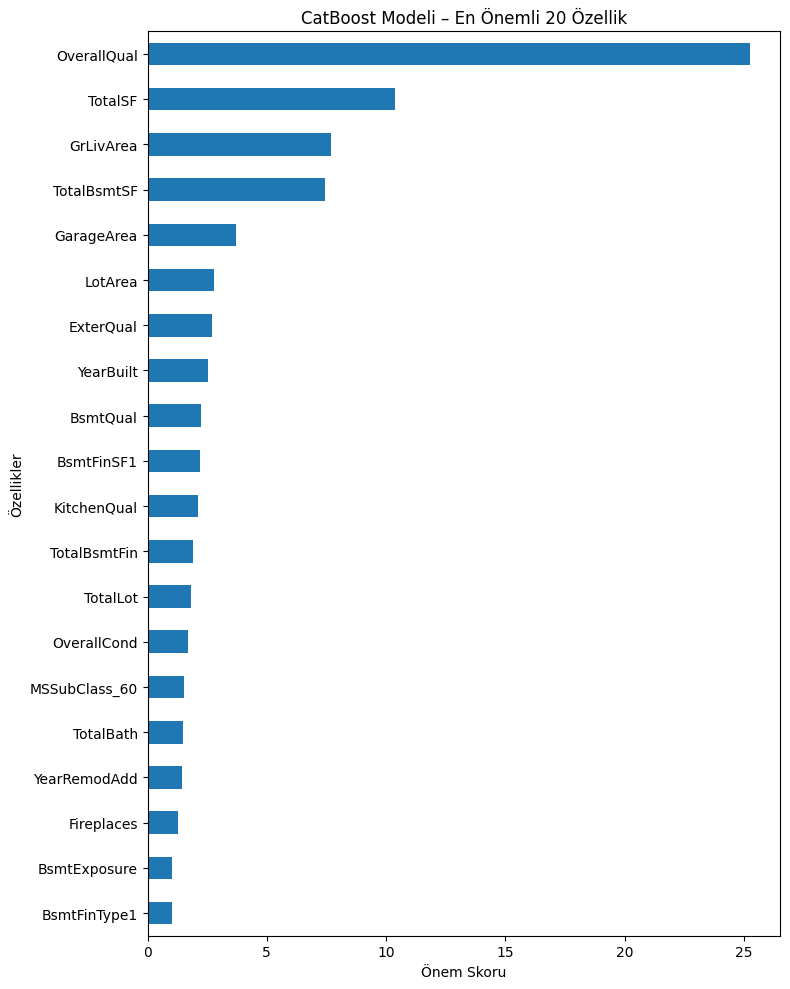

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# CatBoost'un verdiği önem skorları
feat_importances = cb_model.get_feature_importance()
feat_importances = pd.Series(feat_importances, index=X_train.columns)

# En önemli 20 özelliği alalım
feat_importances = feat_importances.sort_values(ascending=True)

plt.figure(figsize=(8, 10))
feat_importances.tail(20).plot(kind="barh")
plt.title("CatBoost Modeli – En Önemli 20 Özellik")
plt.xlabel("Önem Skoru")
plt.ylabel("Özellikler")
plt.tight_layout()
plt.show()


In [71]:
%pip install shap

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/547.0 kB ? eta -:--:--
   ---------------------------------------- 547.0/547.0 kB 2.6 MB/s  0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.7 MB 5.6 MB/s eta 0:00:01
   ------------------- -------------------- 1.3/2.7 MB 3.7 MB/s eta 0:00:01
   -------------------------- ------------- 1.8/2.7 MB 3.5 MB/s eta 0:00:01
   -------------------------------------- - 2.6/2.7 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 3.4 MB/s  0:00:00
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
    --------------------------------------- 0.5/38.1 MB 2.8 MB/s eta 0:00:14
   - -------------------------------------- 1.3/38.1 MB 3.2 MB/s eta 0:00:12
   - -------------------------------------- 1.8/38.1 MB 2.8 MB/s eta 0:00:13
   -- --------------------------

c:\Users\besse\.conda\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


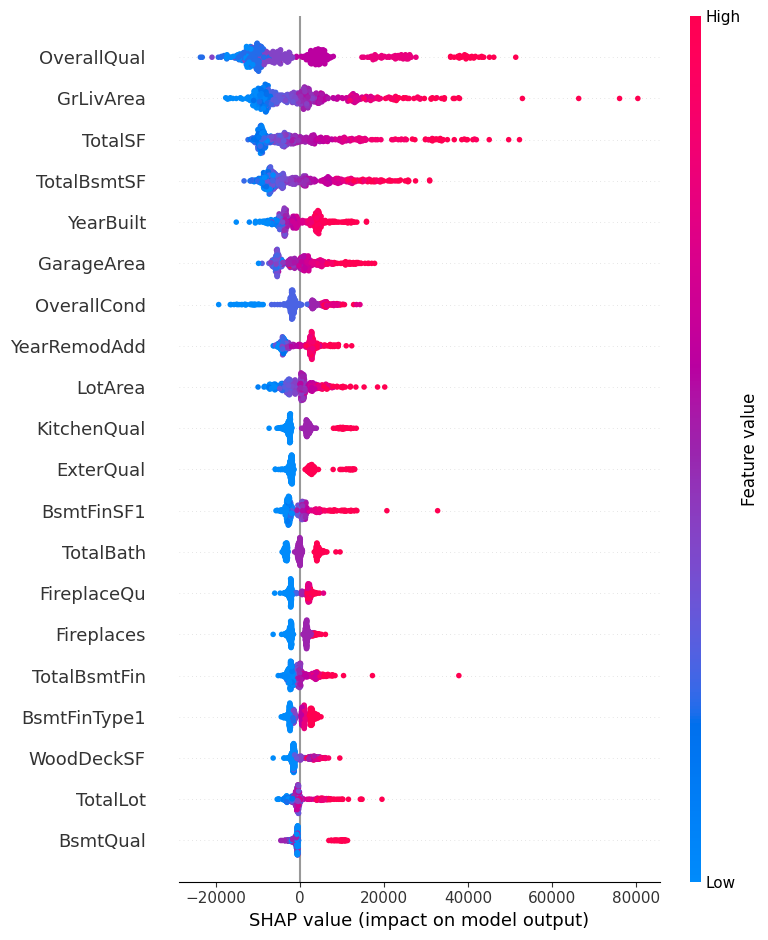

In [72]:
import shap

shap.initjs()

# CatBoost gibi ağaç modeller için TreeExplainer
explainer = shap.TreeExplainer(cb_model)

# Tüm veride hesaplamak ağır olabilir, 500 örnek alalım
X_sample = X_train.sample(500, random_state=42)

shap_values = explainer.shap_values(X_sample)

# Global açıklama: hangi özellikler önemli + etkisi pozitif/negatif mi
shap.summary_plot(shap_values, X_sample)


3.1. İncelenecek tek evi seçelim

In [73]:
# İncelenecek tek bir örnek (örneğin ilk ev)
example_index = 0
x_example = X_train.iloc[[example_index]]


In [74]:
# Bu tek ev için SHAP değerleri
shap_values_example = explainer.shap_values(x_example)


In [75]:
shap.force_plot(
    explainer.expected_value,      # Modelin ortalama tahmini
    shap_values_example,           # Bu evin SHAP katkıları
    x_example
)


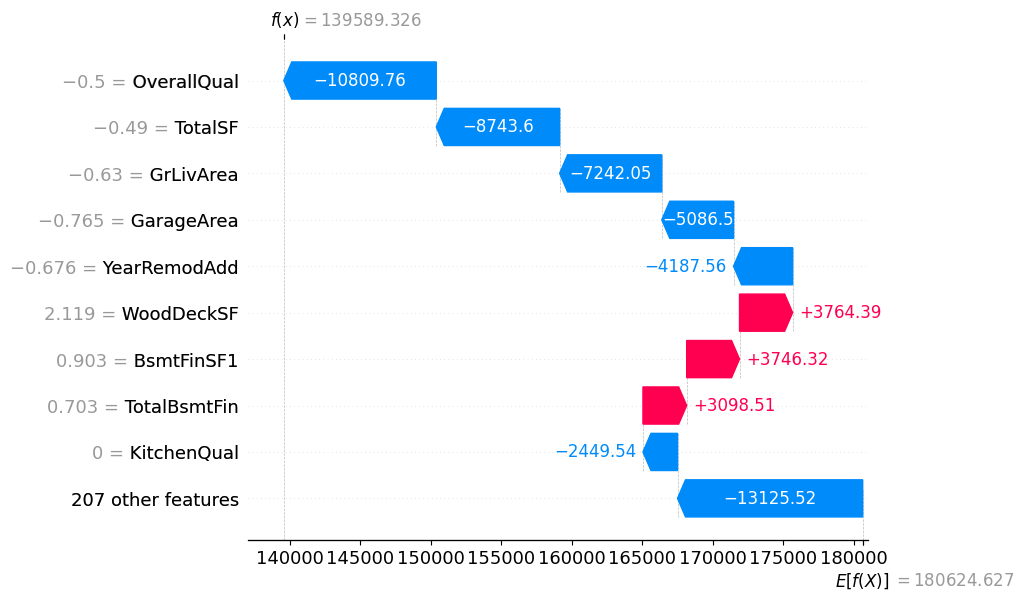

In [76]:
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values_example[0],
        base_values=explainer.expected_value,
        data=x_example.iloc[0],
        feature_names=x_example.columns
    )
)


**Yararlanılan Kaynaklar**

* https://www.kaggle.com/code/angqx95/data-science-workflow-top-2-with-tuning#4.2-Ensemble-Algorithms
* https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python#COMPREHENSIVE-DATA-EXPLORATION-WITH-PYTHON

